In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Load the Boston Housing dataset
data = fetch_california_housing()

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(data.data)
y = data.target.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
import pandas as pd
# Convert the data and target arrays to a Pandas dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Print the first 5 rows of the dataframe
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
# Define input size, hidden size, and output size
D_in = X.shape[1]
H = 8
D_out = 1
print('input size:', D_in)
print('hidden nodes:', H)
print('output size:', D_out)

input size: 8
hidden nodes: 8
output size: 1


# Model 1:
hidden layer = 8

optimizer = *Adam*

learning rate = 0.01

epoch = 1000

In [ ]:
# Define 2-layer neural network
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)

# Create the optimizer
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# Define the loss function
criterion = nn.MSELoss()

In [ ]:
train_losses = []
test_losses = []
# Train the network
for epoch in range(1000):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Collect the training loss values in list
    train_losses.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

Epoch 0, Loss: 4.579242706298828
Epoch 100, Loss: 0.530907154083252
Epoch 200, Loss: 0.41921108961105347
Epoch 300, Loss: 0.3988175690174103
Epoch 400, Loss: 0.38913482427597046
Epoch 500, Loss: 0.3755306601524353
Epoch 600, Loss: 0.3640748858451843
Epoch 700, Loss: 0.35498201847076416
Epoch 800, Loss: 0.34711140394210815
Epoch 900, Loss: 0.3397465646266937


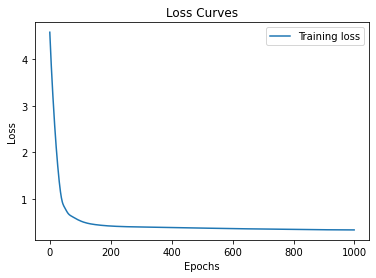

In [ ]:
# Plot the loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the network
model.eval()
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test).float()
    test_labels = torch.from_numpy(y_test).float()
    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_labels)
    print('Test Loss: {}'.format(test_loss.item()))

Test Loss: 0.3424665629863739


# Model 2:
hidden layer = 5

optimizer = *Adam*

learning rate = 0.01

epoch = 1000

input size: 8
hidden nodes: 5
output size: 1
Epoch 0, Loss: 6.848347187042236
Epoch 100, Loss: 0.6713330149650574
Epoch 200, Loss: 0.44481468200683594
Epoch 300, Loss: 0.41456687450408936
Epoch 400, Loss: 0.3963012397289276
Epoch 500, Loss: 0.384259968996048
Epoch 600, Loss: 0.37986040115356445
Epoch 700, Loss: 0.3774958848953247
Epoch 800, Loss: 0.37515202164649963
Epoch 900, Loss: 0.37244027853012085


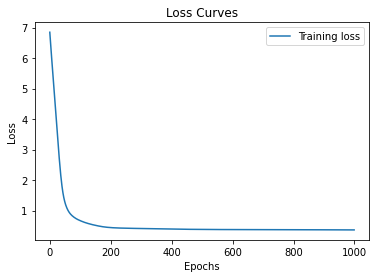

Test Loss: 0.37378811836242676


In [ ]:
# Define input size, hidden size, and output size
D_in = X.shape[1]
H = 5
D_out = 1
print('input size:', D_in)
print('hidden nodes:', H)
print('output size:', D_out)


# Define 2-layer neural network
model_2 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)
# Create the optimizer
learning_rate = 0.01
optimizer = optim.Adam(model_2.parameters(), lr=learning_rate)
# Define the loss function
criterion = nn.MSELoss()

train_losses = []
test_losses = []
# Train the network
for epoch in range(1000):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model_2(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Collect the training loss values in list
    train_losses.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

# Plot the loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the network
model_2.eval()
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test).float()
    test_labels = torch.from_numpy(y_test).float()
    test_outputs = model_2(test_inputs)
    test_loss = criterion(test_outputs, test_labels)
    print('Test Loss: {}'.format(test_loss.item()))

# Model 3:
hidden layer = 10

optimizer = *Adam*

learning rate = 0.01

epoch = 1000



input size: 8
hidden nodes: 10
output size: 1
Epoch 0, Loss: 5.085604190826416
Epoch 100, Loss: 0.5502884984016418
Epoch 200, Loss: 0.41680705547332764
Epoch 300, Loss: 0.3971823751926422
Epoch 400, Loss: 0.3871266543865204
Epoch 500, Loss: 0.37975725531578064
Epoch 600, Loss: 0.3741056025028229
Epoch 700, Loss: 0.3683696389198303
Epoch 800, Loss: 0.36302730441093445
Epoch 900, Loss: 0.35835814476013184


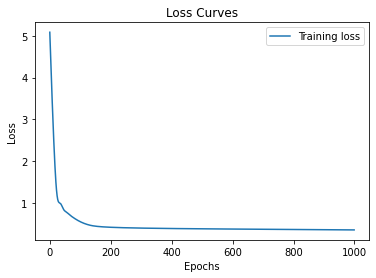

Test Loss: 0.3724297285079956


In [ ]:
# Define input size, hidden size, and output size
D_in = X.shape[1]
H = 10
D_out = 1
print('input size:', D_in)
print('hidden nodes:', H)
print('output size:', D_out)

# Define 2-layer neural network
model_3 = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)
# Create the optimizer
learning_rate = 0.01
optimizer = optim.Adam(model_3.parameters(), lr=learning_rate)
# Define the loss function
criterion = nn.MSELoss()

train_losses = []
test_losses = []
# Train the network
for epoch in range(1000):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model_3(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Collect the training loss values in list
    train_losses.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

# Plot the loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the network
model_3.eval()
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test).float()
    test_labels = torch.from_numpy(y_test).float()
    test_outputs = model_3(test_inputs)
    test_loss = criterion(test_outputs, test_labels)
    print('Test Loss: {}'.format(test_loss.item()))

# Model setting 1:

hidden node : 5, 8, 11

initial weights : small random number

activation funciton : ReLU

learning rate : 0.01, 0.1, 1

weight decay : 0.001, 0.0001

optimizer : Adam

epoch : 100, 200, 300

Learning rate decay : none

=> 比較發現，hidden node 11, learning rate 0.001, epoch 300有最小的test lost {0.6}

In [ ]:
hidden_nodes_list = [5, 8, 11]
learning_rate_list = [0.01, 0.1, 1]
epoch_list = [100, 200, 300]
decay_list = [0, 0.001, 0.0001]

hidden nodes: 5
learning rate: 0.01
epoch: 100
weight decay: 0
Epoch 0, Loss: 4.285763740539551


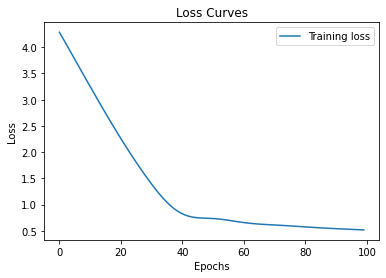

Test Loss: 0.5136300325393677
----------
hidden nodes: 5
learning rate: 0.01
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 4.57901668548584


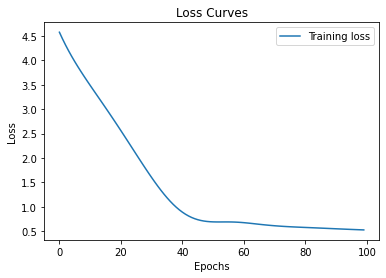

Test Loss: 0.5216661691665649
----------
hidden nodes: 5
learning rate: 0.01
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 6.807073593139648


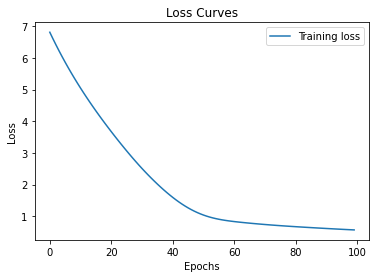

Test Loss: 0.5686951279640198
----------
hidden nodes: 5
learning rate: 0.01
epoch: 200
weight decay: 0
Epoch 0, Loss: 6.0760111808776855
Epoch 100, Loss: 0.6997662782669067


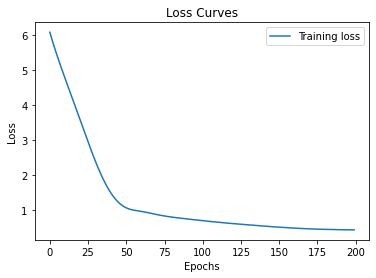

Test Loss: 0.4375472068786621
----------
hidden nodes: 5
learning rate: 0.01
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.799481391906738
Epoch 100, Loss: 0.595373272895813


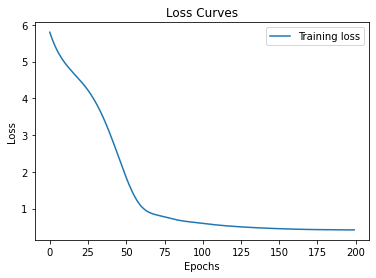

Test Loss: 0.4240091145038605
----------
hidden nodes: 5
learning rate: 0.01
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 5.262090682983398
Epoch 100, Loss: 0.7287488579750061


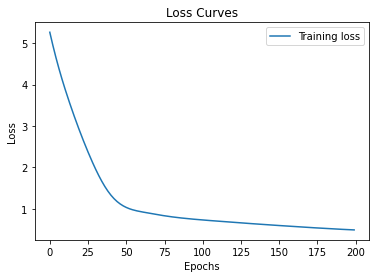

Test Loss: 0.49459436535835266
----------
hidden nodes: 5
learning rate: 0.01
epoch: 300
weight decay: 0
Epoch 0, Loss: 3.5976271629333496
Epoch 100, Loss: 0.490431010723114
Epoch 200, Loss: 0.43705442547798157


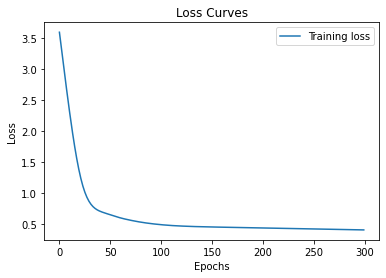

Test Loss: 0.4087863564491272
----------
hidden nodes: 5
learning rate: 0.01
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 7.24928617477417
Epoch 100, Loss: 0.732151448726654
Epoch 200, Loss: 0.46758347749710083


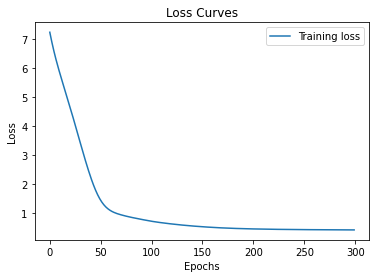

Test Loss: 0.44244906306266785
----------
hidden nodes: 5
learning rate: 0.01
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 6.637362003326416
Epoch 100, Loss: 0.7045372128486633
Epoch 200, Loss: 0.5037747621536255


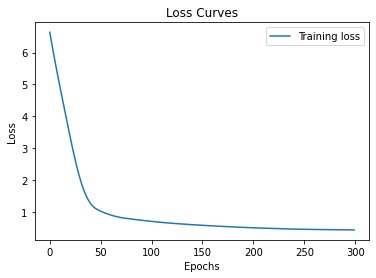

Test Loss: 0.4420446455478668
----------
hidden nodes: 5
learning rate: 0.1
epoch: 100
weight decay: 0
Epoch 0, Loss: 5.188653469085693


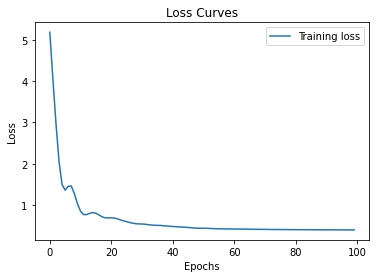

Test Loss: 0.3929341733455658
----------
hidden nodes: 5
learning rate: 0.1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.443694114685059


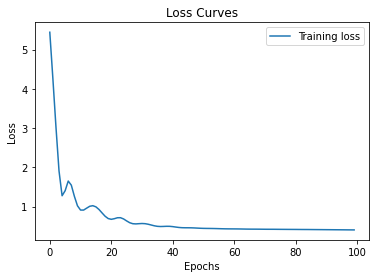

Test Loss: 0.4088863432407379
----------
hidden nodes: 5
learning rate: 0.1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 8.026960372924805


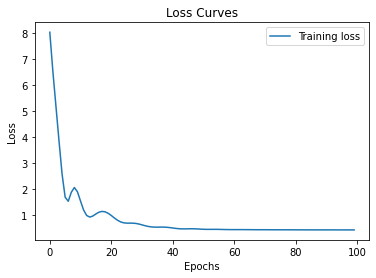

Test Loss: 0.4182887673377991
----------
hidden nodes: 5
learning rate: 0.1
epoch: 200
weight decay: 0
Epoch 0, Loss: 4.3336663246154785
Epoch 100, Loss: 0.39559656381607056


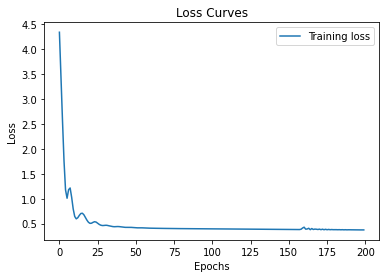

Test Loss: 0.3726072907447815
----------
hidden nodes: 5
learning rate: 0.1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 7.9488630294799805
Epoch 100, Loss: 0.4087980389595032


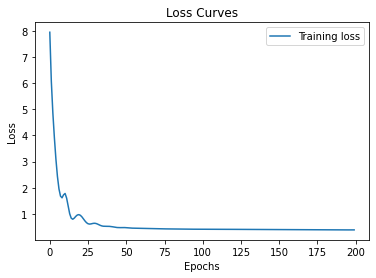

Test Loss: 0.3965505063533783
----------
hidden nodes: 5
learning rate: 0.1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 3.8593738079071045
Epoch 100, Loss: 0.39503219723701477


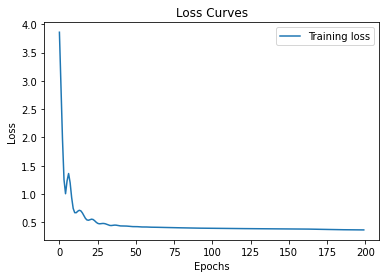

Test Loss: 0.3853532075881958
----------
hidden nodes: 5
learning rate: 0.1
epoch: 300
weight decay: 0
Epoch 0, Loss: 4.140613555908203
Epoch 100, Loss: 0.38435280323028564
Epoch 200, Loss: 0.3664611876010895


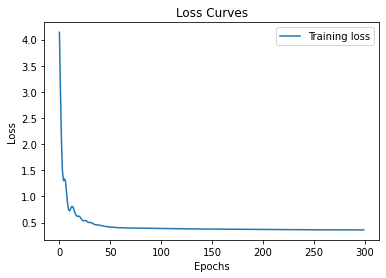

Test Loss: 0.37368857860565186
----------
hidden nodes: 5
learning rate: 0.1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 5.015589714050293
Epoch 100, Loss: 0.41061413288116455
Epoch 200, Loss: 0.3938198685646057


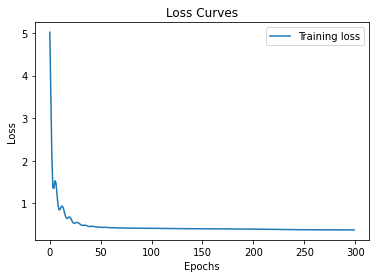

Test Loss: 0.37609320878982544
----------
hidden nodes: 5
learning rate: 0.1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 4.882699489593506
Epoch 100, Loss: 0.3948112428188324
Epoch 200, Loss: 0.37942442297935486


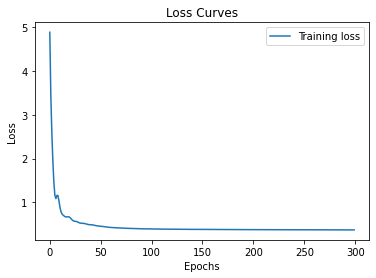

Test Loss: 0.38127052783966064
----------
hidden nodes: 5
learning rate: 1
epoch: 100
weight decay: 0
Epoch 0, Loss: 7.284310340881348


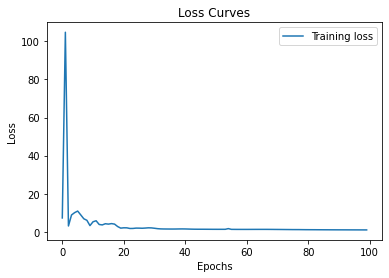

Test Loss: 0.9522011876106262
----------
hidden nodes: 5
learning rate: 1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 6.462547302246094


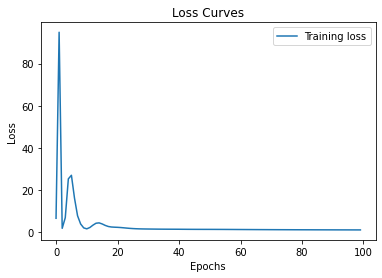

Test Loss: 0.9100035429000854
----------
hidden nodes: 5
learning rate: 1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 6.9466166496276855


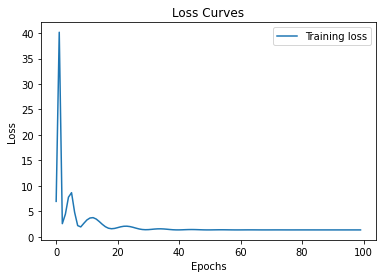

Test Loss: 1.2943037748336792
----------
hidden nodes: 5
learning rate: 1
epoch: 200
weight decay: 0
Epoch 0, Loss: 5.506953716278076
Epoch 100, Loss: 1.2496964931488037


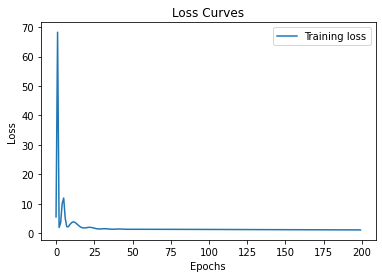

Test Loss: 1.100223183631897
----------
hidden nodes: 5
learning rate: 1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 4.900235176086426
Epoch 100, Loss: 1.3002060651779175


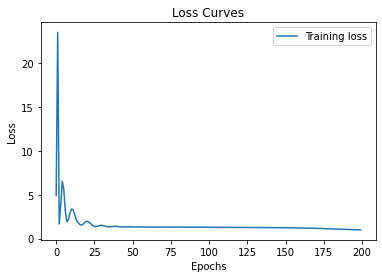

Test Loss: 0.9824992418289185
----------
hidden nodes: 5
learning rate: 1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 8.953506469726562
Epoch 100, Loss: 0.442625492811203


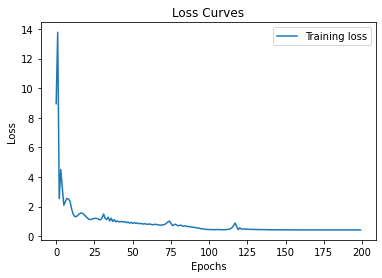

Test Loss: 0.4273536801338196
----------
hidden nodes: 5
learning rate: 1
epoch: 300
weight decay: 0
Epoch 0, Loss: 6.108057975769043
Epoch 100, Loss: 1.3397116661071777
Epoch 200, Loss: 1.3200104236602783


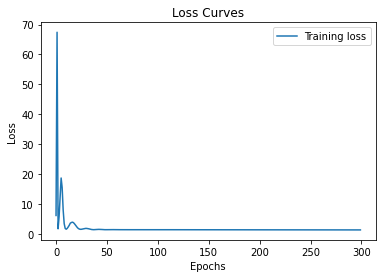

Test Loss: 1.2293415069580078
----------
hidden nodes: 5
learning rate: 1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 5.6641998291015625
Epoch 100, Loss: 1.3415966033935547
Epoch 200, Loss: 1.3415052890777588


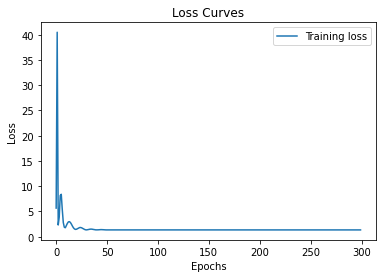

Test Loss: 1.290471076965332
----------
hidden nodes: 5
learning rate: 1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 7.596490383148193
Epoch 100, Loss: 1.3384500741958618
Epoch 200, Loss: 1.2235435247421265


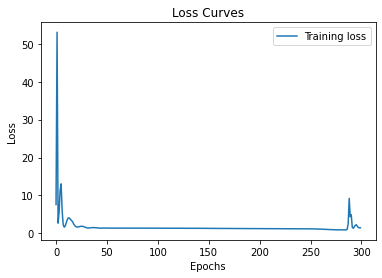

Test Loss: 1.5048099756240845
----------
hidden nodes: 8
learning rate: 0.01
epoch: 100
weight decay: 0
Epoch 0, Loss: 5.770804405212402


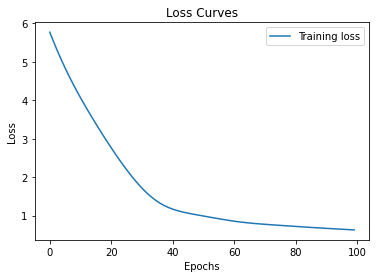

Test Loss: 0.614224374294281
----------
hidden nodes: 8
learning rate: 0.01
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 7.853070259094238


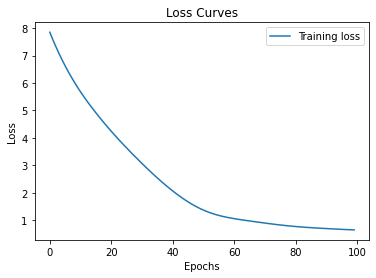

Test Loss: 0.632203221321106
----------
hidden nodes: 8
learning rate: 0.01
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 5.673888206481934


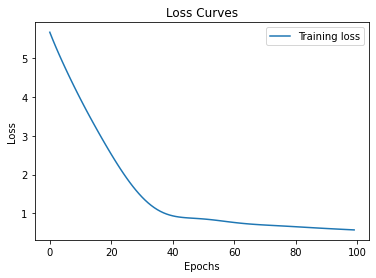

Test Loss: 0.5693812370300293
----------
hidden nodes: 8
learning rate: 0.01
epoch: 200
weight decay: 0
Epoch 0, Loss: 5.3098931312561035
Epoch 100, Loss: 0.5130501985549927


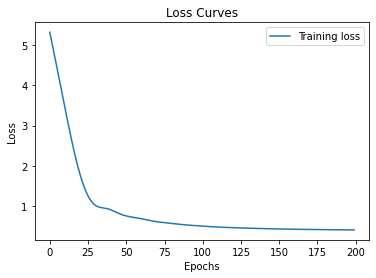

Test Loss: 0.42542707920074463
----------
hidden nodes: 8
learning rate: 0.01
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 6.695598602294922
Epoch 100, Loss: 0.5439711213111877


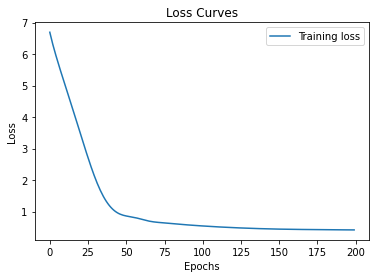

Test Loss: 0.42327767610549927
----------
hidden nodes: 8
learning rate: 0.01
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 5.025203227996826
Epoch 100, Loss: 0.5339173674583435


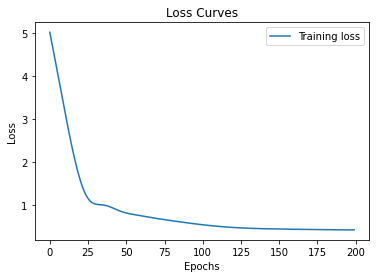

Test Loss: 0.41828086972236633
----------
hidden nodes: 8
learning rate: 0.01
epoch: 300
weight decay: 0
Epoch 0, Loss: 6.420273303985596
Epoch 100, Loss: 0.6241231560707092
Epoch 200, Loss: 0.42581120133399963


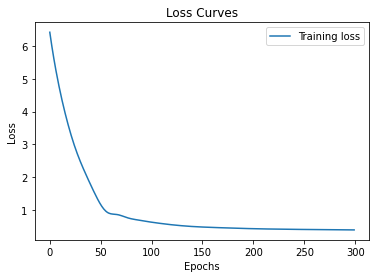

Test Loss: 0.4034861624240875
----------
hidden nodes: 8
learning rate: 0.01
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 5.095963954925537
Epoch 100, Loss: 0.510343611240387
Epoch 200, Loss: 0.43079879879951477


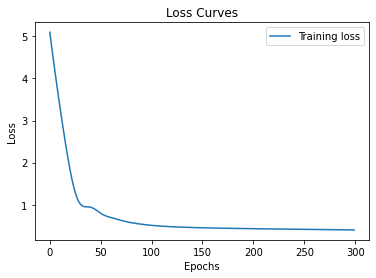

Test Loss: 0.4125381410121918
----------
hidden nodes: 8
learning rate: 0.01
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 5.771604537963867
Epoch 100, Loss: 0.5939652919769287
Epoch 200, Loss: 0.4465450346469879


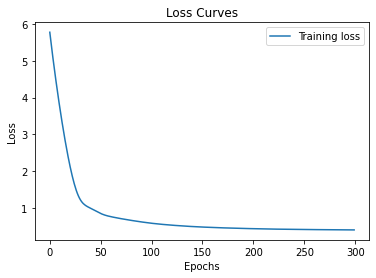

Test Loss: 0.4176216423511505
----------
hidden nodes: 8
learning rate: 0.1
epoch: 100
weight decay: 0
Epoch 0, Loss: 5.783176422119141


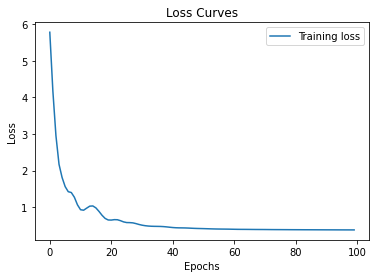

Test Loss: 0.3868236541748047
----------
hidden nodes: 8
learning rate: 0.1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.027447700500488


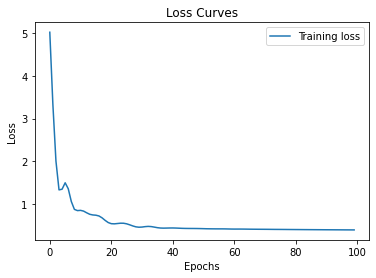

Test Loss: 0.39572203159332275
----------
hidden nodes: 8
learning rate: 0.1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 7.986806869506836


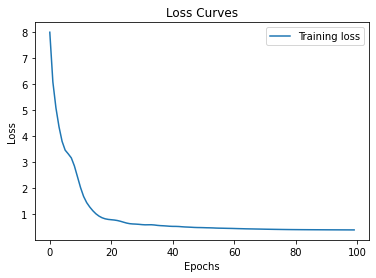

Test Loss: 0.40866732597351074
----------
hidden nodes: 8
learning rate: 0.1
epoch: 200
weight decay: 0
Epoch 0, Loss: 5.344991683959961
Epoch 100, Loss: 0.389667809009552


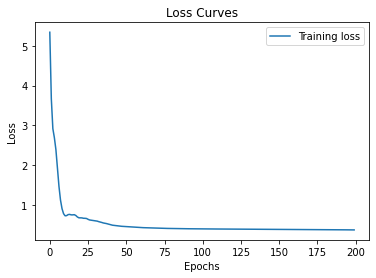

Test Loss: 0.37363818287849426
----------
hidden nodes: 8
learning rate: 0.1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.012392997741699
Epoch 100, Loss: 0.4032762348651886


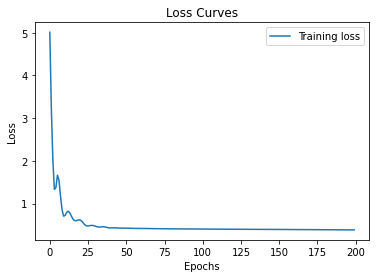

Test Loss: 0.38414809107780457
----------
hidden nodes: 8
learning rate: 0.1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 6.700384616851807
Epoch 100, Loss: 0.394977867603302


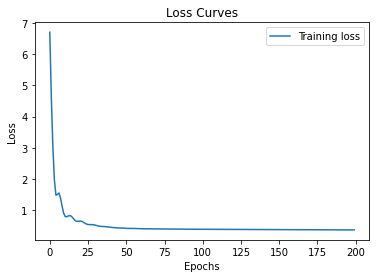

Test Loss: 0.38376161456108093
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
weight decay: 0
Epoch 0, Loss: 7.237005710601807
Epoch 100, Loss: 0.3903968632221222
Epoch 200, Loss: 0.34008684754371643


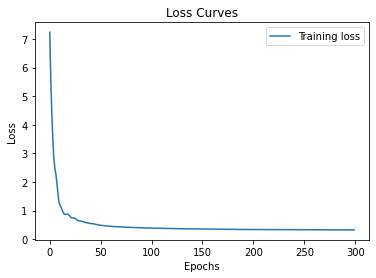

Test Loss: 0.34802740812301636
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 6.450944423675537
Epoch 100, Loss: 0.40115782618522644
Epoch 200, Loss: 0.387153297662735


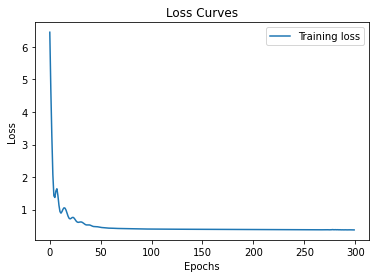

Test Loss: 0.37838342785835266
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 4.11178731918335
Epoch 100, Loss: 0.36944225430488586
Epoch 200, Loss: 0.343330055475235


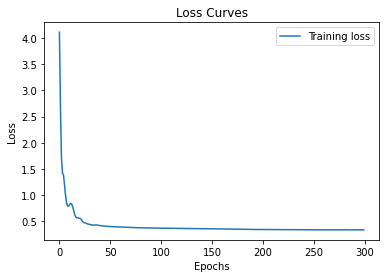

Test Loss: 0.34849658608436584
----------
hidden nodes: 8
learning rate: 1
epoch: 100
weight decay: 0
Epoch 0, Loss: 5.386170387268066


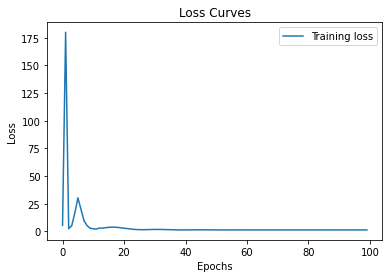

Test Loss: 1.3005261421203613
----------
hidden nodes: 8
learning rate: 1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.59406042098999


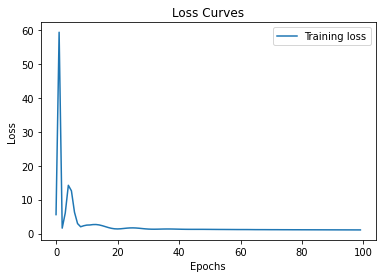

Test Loss: 1.067576289176941
----------
hidden nodes: 8
learning rate: 1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 5.344520568847656


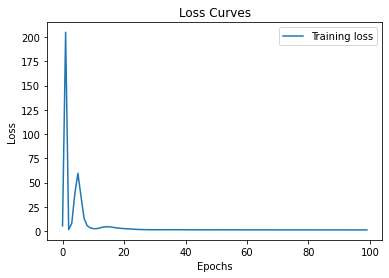

Test Loss: 1.2239433526992798
----------
hidden nodes: 8
learning rate: 1
epoch: 200
weight decay: 0
Epoch 0, Loss: 4.517871379852295
Epoch 100, Loss: 1.2121586799621582


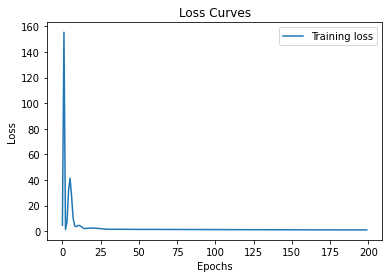

Test Loss: 0.9212350845336914
----------
hidden nodes: 8
learning rate: 1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.982272624969482
Epoch 100, Loss: 0.8997637629508972


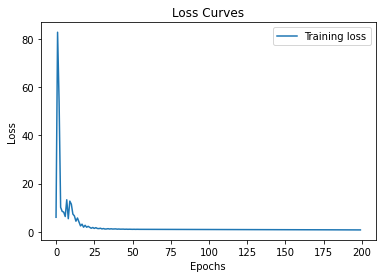

Test Loss: 0.6962389349937439
----------
hidden nodes: 8
learning rate: 1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 3.389238119125366
Epoch 100, Loss: 1.3353585004806519


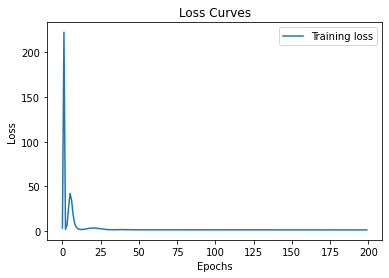

Test Loss: 1.226494312286377
----------
hidden nodes: 8
learning rate: 1
epoch: 300
weight decay: 0
Epoch 0, Loss: 5.551299095153809
Epoch 100, Loss: 1.341813564300537
Epoch 200, Loss: 1.340662956237793


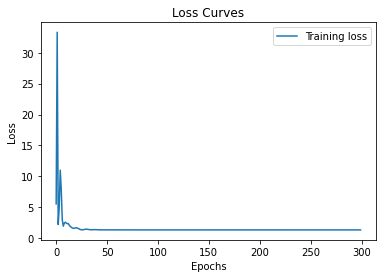

Test Loss: 1.2907483577728271
----------
hidden nodes: 8
learning rate: 1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 6.3435258865356445
Epoch 100, Loss: 0.6228945851325989
Epoch 200, Loss: 0.4305635988712311


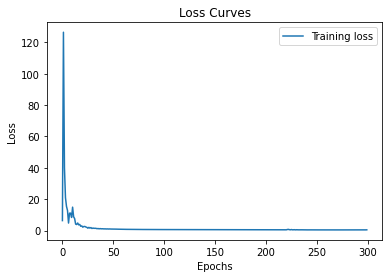

Test Loss: 0.5267810225486755
----------
hidden nodes: 8
learning rate: 1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 7.165032863616943
Epoch 100, Loss: 1.3396174907684326
Epoch 200, Loss: 1.3328964710235596


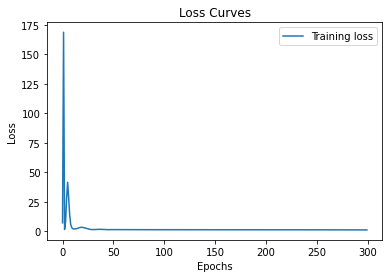

Test Loss: 1.1407334804534912
----------
hidden nodes: 11
learning rate: 0.01
epoch: 100
weight decay: 0
Epoch 0, Loss: 5.5581374168396


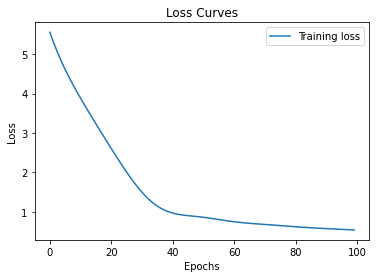

Test Loss: 0.540495753288269
----------
hidden nodes: 11
learning rate: 0.01
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.666362762451172


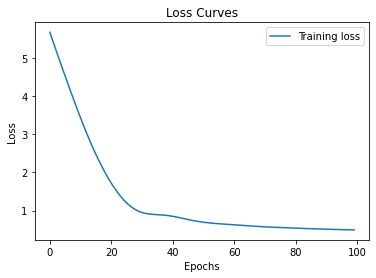

Test Loss: 0.4944861829280853
----------
hidden nodes: 11
learning rate: 0.01
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 4.49064302444458


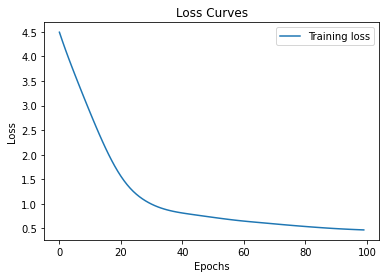

Test Loss: 0.4672461748123169
----------
hidden nodes: 11
learning rate: 0.01
epoch: 200
weight decay: 0
Epoch 0, Loss: 5.635954856872559
Epoch 100, Loss: 0.4996035695075989


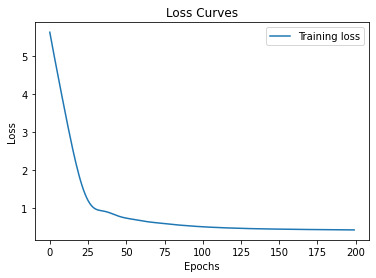

Test Loss: 0.42134132981300354
----------
hidden nodes: 11
learning rate: 0.01
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.613797187805176
Epoch 100, Loss: 0.49987563490867615


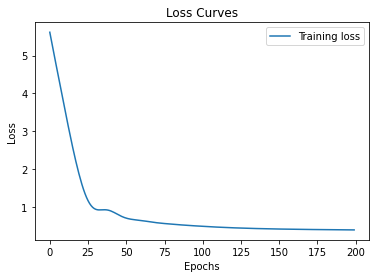

Test Loss: 0.42506179213523865
----------
hidden nodes: 11
learning rate: 0.01
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 4.301981449127197
Epoch 100, Loss: 0.47547829151153564


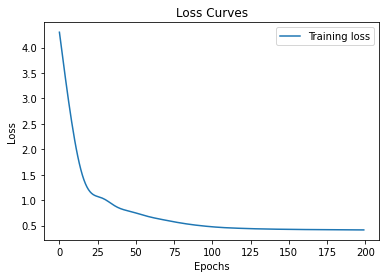

Test Loss: 0.4180327355861664
----------
hidden nodes: 11
learning rate: 0.01
epoch: 300
weight decay: 0
Epoch 0, Loss: 4.323647975921631
Epoch 100, Loss: 0.48358893394470215
Epoch 200, Loss: 0.4069858193397522


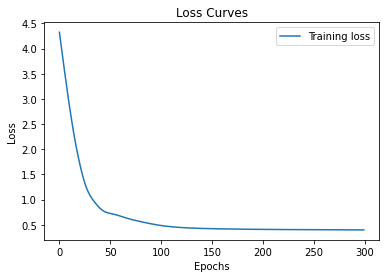

Test Loss: 0.39559951424598694
----------
hidden nodes: 11
learning rate: 0.01
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 6.530730247497559
Epoch 100, Loss: 0.5315309166908264
Epoch 200, Loss: 0.4307272732257843


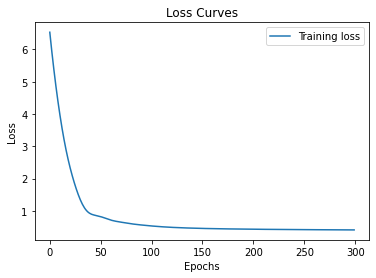

Test Loss: 0.41783785820007324
----------
hidden nodes: 11
learning rate: 0.01
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 7.145524978637695
Epoch 100, Loss: 0.6197710037231445
Epoch 200, Loss: 0.4351035952568054


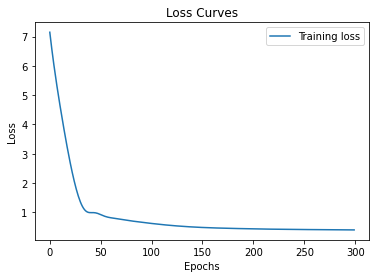

Test Loss: 0.4092625081539154
----------
hidden nodes: 11
learning rate: 0.1
epoch: 100
weight decay: 0
Epoch 0, Loss: 3.5248992443084717


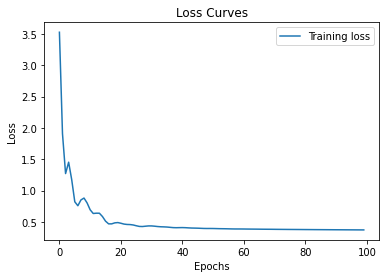

Test Loss: 0.37945428490638733
----------
hidden nodes: 11
learning rate: 0.1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 7.773909091949463


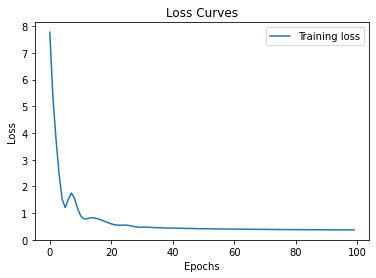

Test Loss: 0.3774878680706024
----------
hidden nodes: 11
learning rate: 0.1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 6.358853340148926


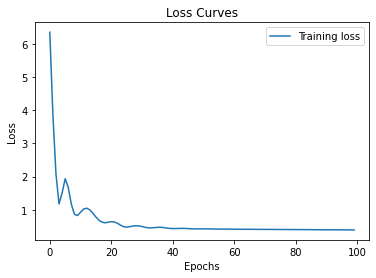

Test Loss: 0.390698105096817
----------
hidden nodes: 11
learning rate: 0.1
epoch: 200
weight decay: 0
Epoch 0, Loss: 6.50927734375
Epoch 100, Loss: 0.375016450881958


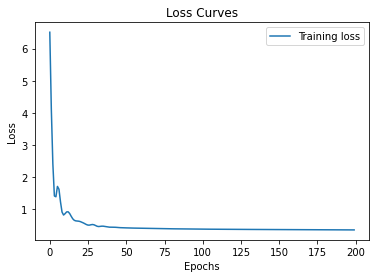

Test Loss: 0.3526375889778137
----------
hidden nodes: 11
learning rate: 0.1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.130356311798096
Epoch 100, Loss: 0.38753262162208557


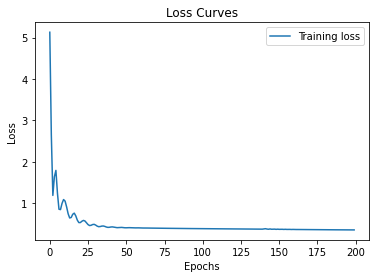

Test Loss: 0.36994531750679016
----------
hidden nodes: 11
learning rate: 0.1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 7.3151702880859375
Epoch 100, Loss: 0.37091830372810364


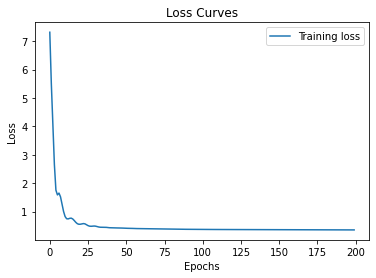

Test Loss: 0.36711984872817993
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
weight decay: 0
Epoch 0, Loss: 6.656357765197754
Epoch 100, Loss: 0.3893004059791565
Epoch 200, Loss: 0.3638349771499634


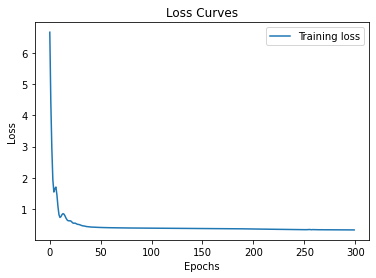

Test Loss: 0.3436964452266693
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 7.923576354980469
Epoch 100, Loss: 0.37217697501182556
Epoch 200, Loss: 0.34840747714042664


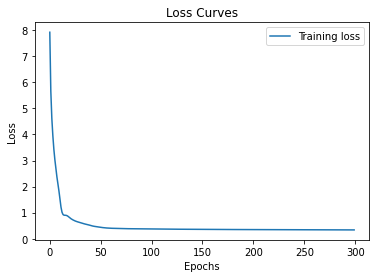

Test Loss: 0.35241246223449707
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 5.794318675994873
Epoch 100, Loss: 0.36718738079071045
Epoch 200, Loss: 0.34070995450019836


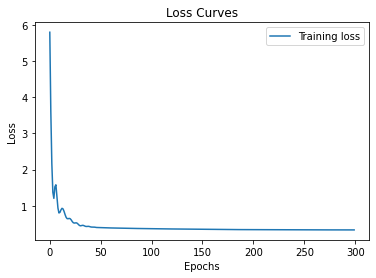

Test Loss: 0.35067906975746155
----------
hidden nodes: 11
learning rate: 1
epoch: 100
weight decay: 0
Epoch 0, Loss: 7.170103549957275


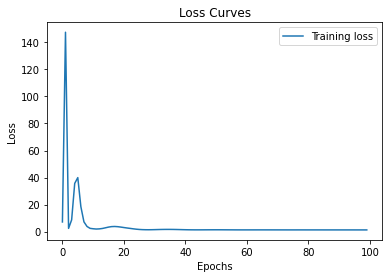

Test Loss: 1.2432115077972412
----------
hidden nodes: 11
learning rate: 1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 4.907468795776367


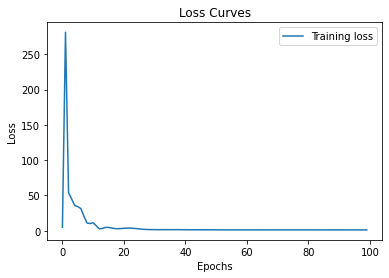

Test Loss: 1.1983157396316528
----------
hidden nodes: 11
learning rate: 1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 5.8135199546813965


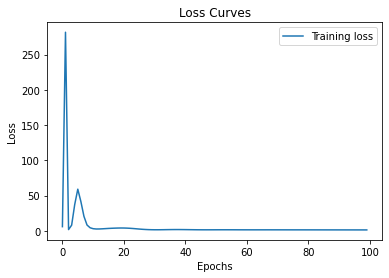

Test Loss: 1.1946697235107422
----------
hidden nodes: 11
learning rate: 1
epoch: 200
weight decay: 0
Epoch 0, Loss: 4.28452205657959
Epoch 100, Loss: 1.2504500150680542


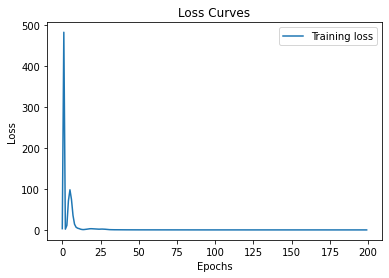

Test Loss: 1.1799155473709106
----------
hidden nodes: 11
learning rate: 1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.552349090576172
Epoch 100, Loss: 1.3258458375930786


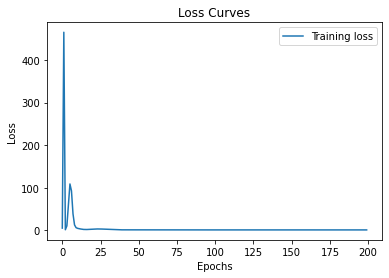

Test Loss: 1.2642710208892822
----------
hidden nodes: 11
learning rate: 1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 4.70363712310791
Epoch 100, Loss: 1.2615642547607422


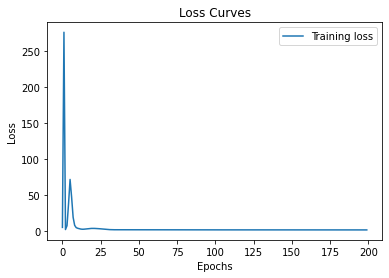

Test Loss: 1.1545336246490479
----------
hidden nodes: 11
learning rate: 1
epoch: 300
weight decay: 0
Epoch 0, Loss: 6.183791160583496
Epoch 100, Loss: 1.2521560192108154
Epoch 200, Loss: 1.161503791809082


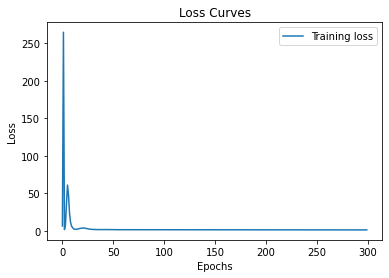

Test Loss: 0.9898740649223328
----------
hidden nodes: 11
learning rate: 1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 6.696405410766602
Epoch 100, Loss: 1.3406095504760742
Epoch 200, Loss: 1.3257580995559692


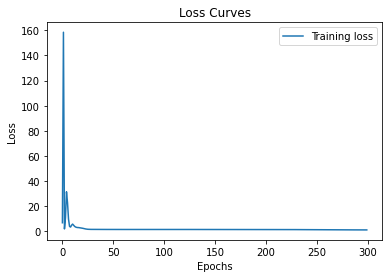

Test Loss: 0.9755359888076782
----------
hidden nodes: 11
learning rate: 1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 4.946835517883301
Epoch 100, Loss: 1.3437955379486084
Epoch 200, Loss: 1.341087818145752


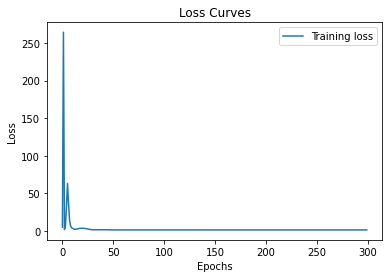

Test Loss: 1.2913273572921753
----------


In [ ]:
test_loss_list = []
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      for weight_decay in decay_list:
        # Define input size, hidden size, and output size
        D_in = X.shape[1]
        H = hidden_nodes
        D_out = 1
        
        print('hidden nodes:', H)
        print('learning rate:', lr_rate)
        print('epoch:', ep)
        print('weight decay:', weight_decay)
        # Define 2-layer neural network
        model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, D_out)
        )
        # Create the optimizer
        learning_rate = lr_rate
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        # Define the loss function
        criterion = nn.MSELoss()

        train_losses = []
        test_losses = []
        # Train the network
        for epoch in range(ep):
            inputs = torch.from_numpy(X_train).float()
            labels = torch.from_numpy(y_train).float()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Collect the training loss values in list
            train_losses.append(loss.item())

            if epoch % 100 == 0:
                print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

        # Plot the loss curves
        plt.plot(range(len(train_losses)), train_losses, label='Training loss')
        plt.title('Loss Curves')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Evaluate the network
        model.eval()
        with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))

        test_loss_list.append(test_loss)
        print('----------')

In [ ]:
min_value = min(test_loss_list)
min_index = test_loss_list.index(min_value)
print(min_value, min_index)
print('loss average :', sum(test_loss_list)/len(test_loss_list))

tensor(0.3437) 69
loss average : tensor(0.6461)


# Model setting 2: 

(setting 1 ReLU -> Tanh)

hidden node : 5, 8, 11

initial weights : small random number

activation funciton : Tanh

learning rate : 0.01, 0.1, 1

weight decay : 0.001, 0.0001

optimizer : Adam

epoch : 100, 200, 300

Learning rate decay : none

=> 把activation funciton換成「Tanh」後，model比setting 1好一點點

In [ ]:
hidden_nodes_list = [5, 8, 11]
learning_rate_list = [0.01, 0.1, 1]
epoch_list = [100, 200, 300]
decay_list = [0, 0.001, 0.0001]

hidden nodes: 5
learning rate: 0.01
epoch: 100
weight decay: 0
Epoch 0, Loss: 5.532107830047607


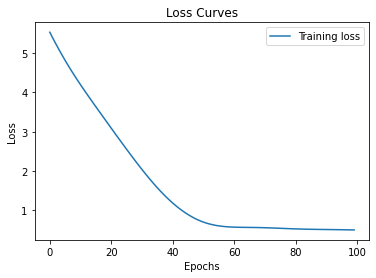

Test Loss: 0.5107337832450867
----------
hidden nodes: 5
learning rate: 0.01
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 6.29504919052124


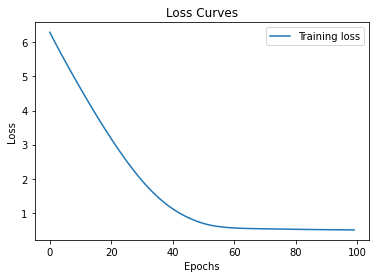

Test Loss: 0.5104550719261169
----------
hidden nodes: 5
learning rate: 0.01
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 6.762205123901367


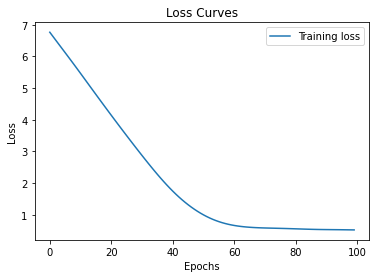

Test Loss: 0.5286582112312317
----------
hidden nodes: 5
learning rate: 0.01
epoch: 200
weight decay: 0
Epoch 0, Loss: 4.126868724822998
Epoch 100, Loss: 0.5169644355773926


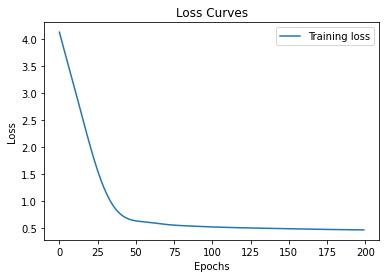

Test Loss: 0.46986666321754456
----------
hidden nodes: 5
learning rate: 0.01
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.305672645568848
Epoch 100, Loss: 0.5227227807044983


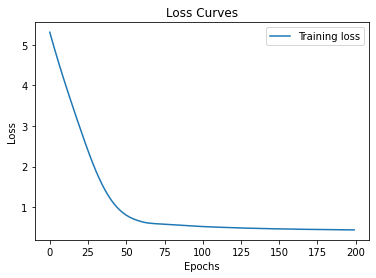

Test Loss: 0.4492887258529663
----------
hidden nodes: 5
learning rate: 0.01
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 4.413202285766602
Epoch 100, Loss: 0.5146915912628174


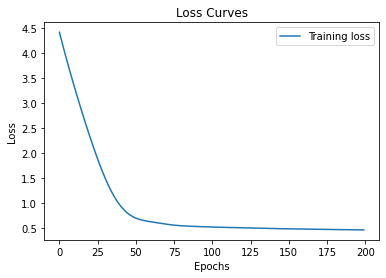

Test Loss: 0.4653714895248413
----------
hidden nodes: 5
learning rate: 0.01
epoch: 300
weight decay: 0
Epoch 0, Loss: 5.955807209014893
Epoch 100, Loss: 0.5308287739753723
Epoch 200, Loss: 0.4684295654296875


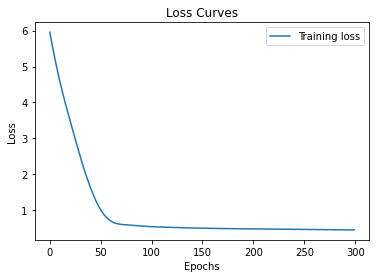

Test Loss: 0.4560454785823822
----------
hidden nodes: 5
learning rate: 0.01
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 7.27928352355957
Epoch 100, Loss: 0.5562637448310852
Epoch 200, Loss: 0.4693613052368164


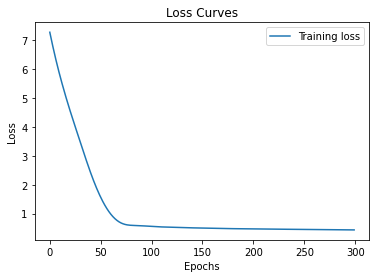

Test Loss: 0.4510178565979004
----------
hidden nodes: 5
learning rate: 0.01
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 5.903900146484375
Epoch 100, Loss: 0.586499810218811
Epoch 200, Loss: 0.48564279079437256


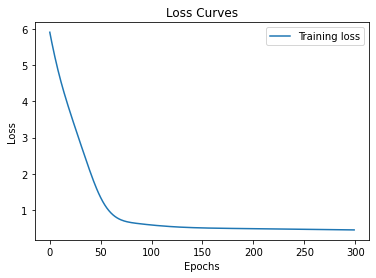

Test Loss: 0.46677860617637634
----------
hidden nodes: 5
learning rate: 0.1
epoch: 100
weight decay: 0
Epoch 0, Loss: 7.004948139190674


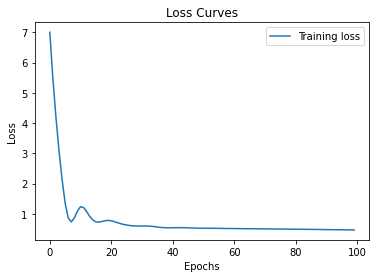

Test Loss: 0.485278457403183
----------
hidden nodes: 5
learning rate: 0.1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.325292110443115


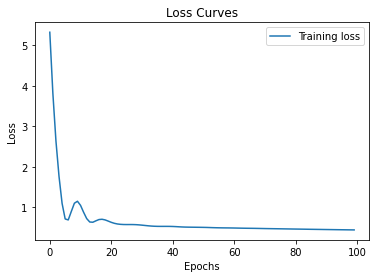

Test Loss: 0.45598047971725464
----------
hidden nodes: 5
learning rate: 0.1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 6.019916534423828


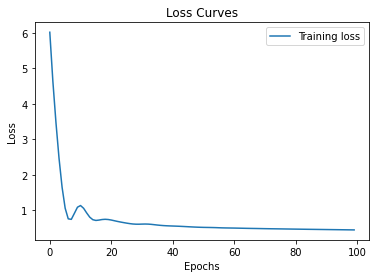

Test Loss: 0.46549034118652344
----------
hidden nodes: 5
learning rate: 0.1
epoch: 200
weight decay: 0
Epoch 0, Loss: 5.0590314865112305
Epoch 100, Loss: 0.42046821117401123


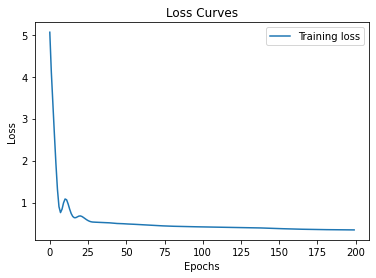

Test Loss: 0.3704821467399597
----------
hidden nodes: 5
learning rate: 0.1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.912275314331055
Epoch 100, Loss: 0.4268137812614441


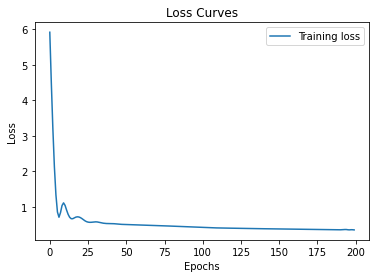

Test Loss: 0.38259613513946533
----------
hidden nodes: 5
learning rate: 0.1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 4.475232124328613
Epoch 100, Loss: 0.364869087934494


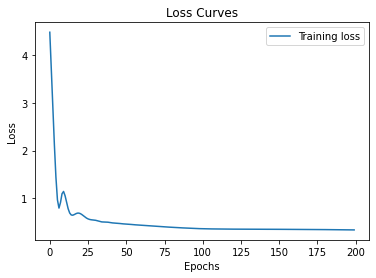

Test Loss: 0.3598330616950989
----------
hidden nodes: 5
learning rate: 0.1
epoch: 300
weight decay: 0
Epoch 0, Loss: 4.441610336303711
Epoch 100, Loss: 0.39659222960472107
Epoch 200, Loss: 0.3422021269798279


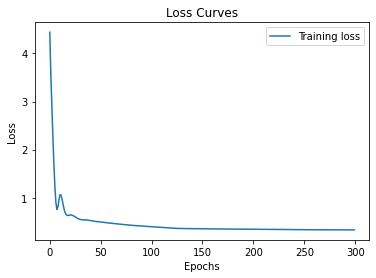

Test Loss: 0.34553319215774536
----------
hidden nodes: 5
learning rate: 0.1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 5.662067413330078
Epoch 100, Loss: 0.3943597376346588
Epoch 200, Loss: 0.35654526948928833


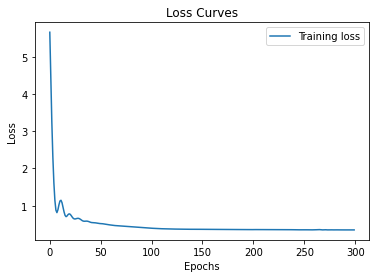

Test Loss: 0.36365807056427
----------
hidden nodes: 5
learning rate: 0.1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 4.467560768127441
Epoch 100, Loss: 0.41136324405670166
Epoch 200, Loss: 0.3650485575199127


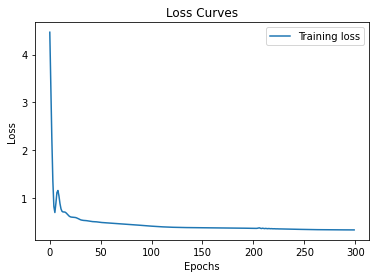

Test Loss: 0.3568367063999176
----------
hidden nodes: 5
learning rate: 1
epoch: 100
weight decay: 0
Epoch 0, Loss: 6.268752574920654


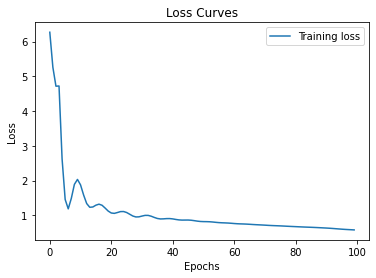

Test Loss: 0.5925138592720032
----------
hidden nodes: 5
learning rate: 1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.655205249786377


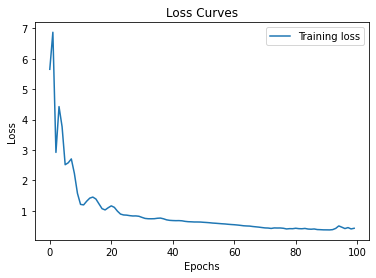

Test Loss: 0.41702884435653687
----------
hidden nodes: 5
learning rate: 1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 4.635385513305664


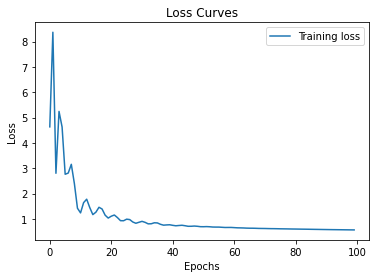

Test Loss: 0.5797490477561951
----------
hidden nodes: 5
learning rate: 1
epoch: 200
weight decay: 0
Epoch 0, Loss: 4.843709468841553
Epoch 100, Loss: 0.5399859547615051


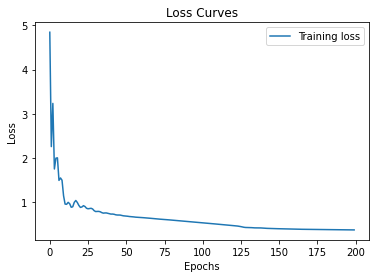

Test Loss: 0.3896728754043579
----------
hidden nodes: 5
learning rate: 1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 8.134377479553223
Epoch 100, Loss: 0.44817736744880676


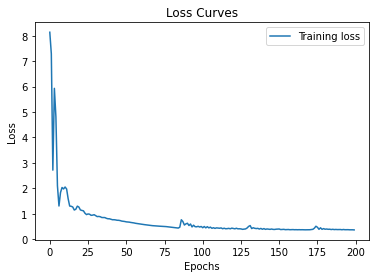

Test Loss: 0.37708407640457153
----------
hidden nodes: 5
learning rate: 1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 4.790109634399414
Epoch 100, Loss: 0.5284440517425537


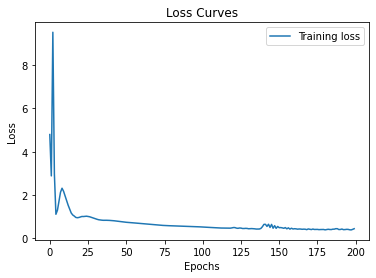

Test Loss: 0.44043058156967163
----------
hidden nodes: 5
learning rate: 1
epoch: 300
weight decay: 0
Epoch 0, Loss: 3.97807240486145
Epoch 100, Loss: 0.5315364599227905
Epoch 200, Loss: 0.39941057562828064


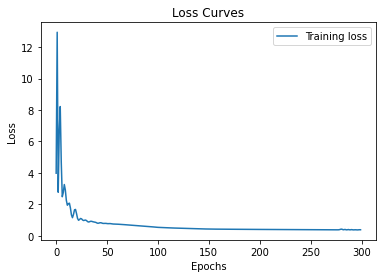

Test Loss: 0.3889177739620209
----------
hidden nodes: 5
learning rate: 1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 6.837226390838623
Epoch 100, Loss: 0.39496588706970215
Epoch 200, Loss: 0.3799884617328644


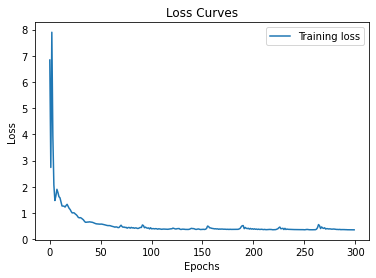

Test Loss: 0.36766231060028076
----------
hidden nodes: 5
learning rate: 1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 6.726570129394531
Epoch 100, Loss: 0.6439504027366638
Epoch 200, Loss: 0.4457126557826996


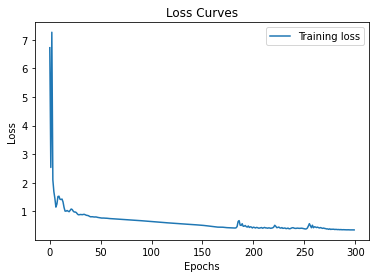

Test Loss: 0.36565425992012024
----------
hidden nodes: 8
learning rate: 0.01
epoch: 100
weight decay: 0
Epoch 0, Loss: 5.8115034103393555


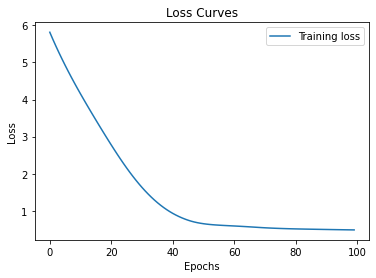

Test Loss: 0.5005407929420471
----------
hidden nodes: 8
learning rate: 0.01
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.589907169342041


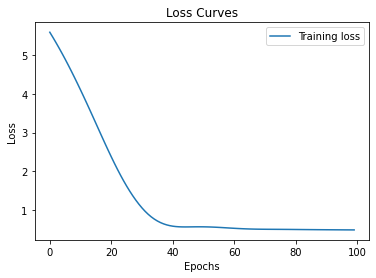

Test Loss: 0.4995039105415344
----------
hidden nodes: 8
learning rate: 0.01
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 4.8335280418396


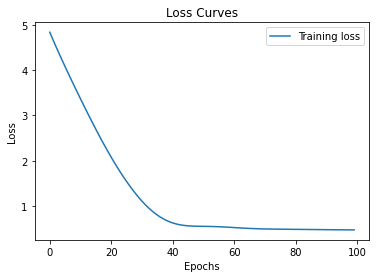

Test Loss: 0.4918365776538849
----------
hidden nodes: 8
learning rate: 0.01
epoch: 200
weight decay: 0
Epoch 0, Loss: 4.7439069747924805
Epoch 100, Loss: 0.4957140386104584


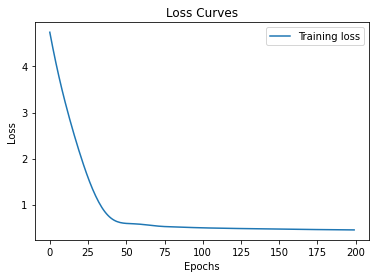

Test Loss: 0.4623183310031891
----------
hidden nodes: 8
learning rate: 0.01
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 6.6974616050720215
Epoch 100, Loss: 0.491900771856308


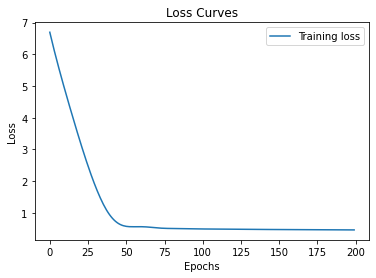

Test Loss: 0.4747682213783264
----------
hidden nodes: 8
learning rate: 0.01
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 5.701383590698242
Epoch 100, Loss: 0.49668800830841064


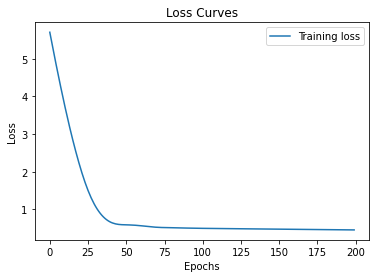

Test Loss: 0.466116338968277
----------
hidden nodes: 8
learning rate: 0.01
epoch: 300
weight decay: 0
Epoch 0, Loss: 6.329216003417969
Epoch 100, Loss: 0.48089537024497986
Epoch 200, Loss: 0.44958698749542236


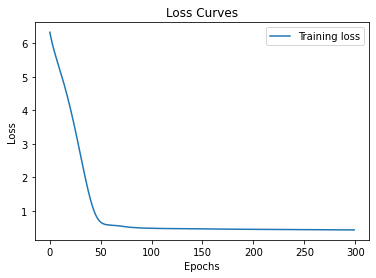

Test Loss: 0.44442957639694214
----------
hidden nodes: 8
learning rate: 0.01
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 5.857616424560547
Epoch 100, Loss: 0.49272313714027405
Epoch 200, Loss: 0.45217207074165344


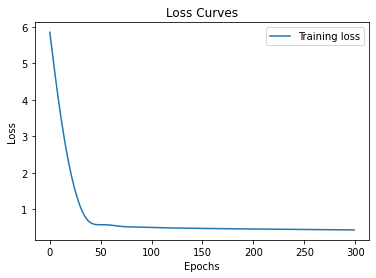

Test Loss: 0.44077223539352417
----------
hidden nodes: 8
learning rate: 0.01
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 6.679533958435059
Epoch 100, Loss: 0.4948875308036804
Epoch 200, Loss: 0.4462684690952301


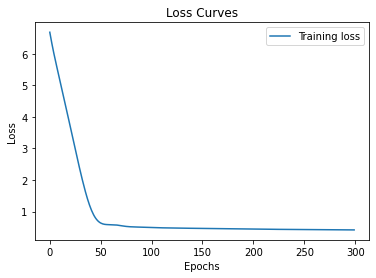

Test Loss: 0.43974751234054565
----------
hidden nodes: 8
learning rate: 0.1
epoch: 100
weight decay: 0
Epoch 0, Loss: 7.568890571594238


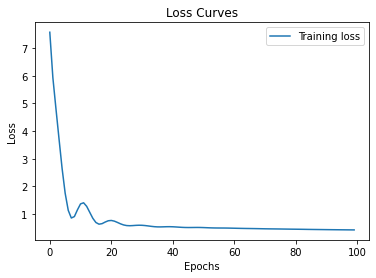

Test Loss: 0.446592777967453
----------
hidden nodes: 8
learning rate: 0.1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 4.425786018371582


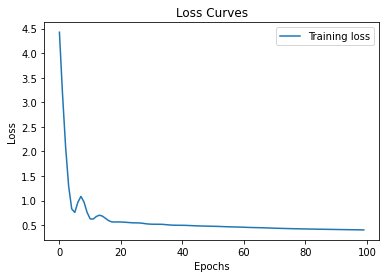

Test Loss: 0.4151874780654907
----------
hidden nodes: 8
learning rate: 0.1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 5.068680763244629


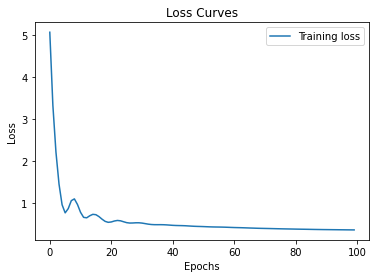

Test Loss: 0.38736721873283386
----------
hidden nodes: 8
learning rate: 0.1
epoch: 200
weight decay: 0
Epoch 0, Loss: 4.212954521179199
Epoch 100, Loss: 0.36809489130973816


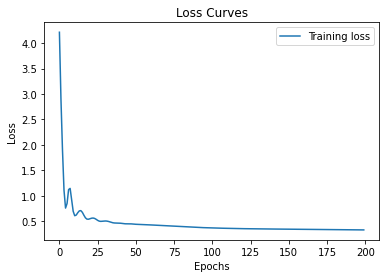

Test Loss: 0.34866032004356384
----------
hidden nodes: 8
learning rate: 0.1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 6.487193584442139
Epoch 100, Loss: 0.39780017733573914


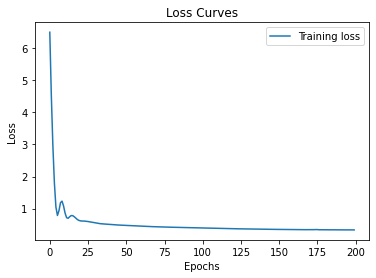

Test Loss: 0.35620537400245667
----------
hidden nodes: 8
learning rate: 0.1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 5.485158920288086
Epoch 100, Loss: 0.40270063281059265


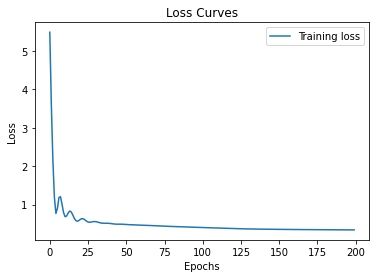

Test Loss: 0.36179792881011963
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
weight decay: 0
Epoch 0, Loss: 5.192453861236572
Epoch 100, Loss: 0.3946268856525421
Epoch 200, Loss: 0.3285706043243408


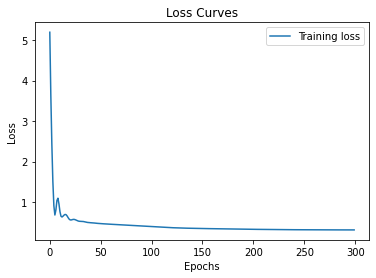

Test Loss: 0.34318235516548157
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 6.198956489562988
Epoch 100, Loss: 0.39918971061706543
Epoch 200, Loss: 0.34524327516555786


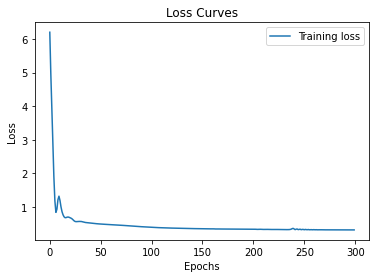

Test Loss: 0.3400821089744568
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 6.456803321838379
Epoch 100, Loss: 0.4031676948070526
Epoch 200, Loss: 0.33455583453178406


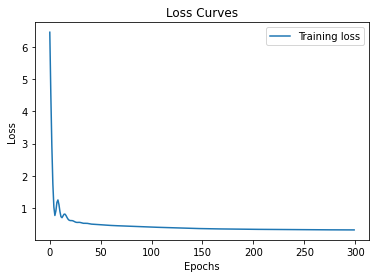

Test Loss: 0.334626168012619
----------
hidden nodes: 8
learning rate: 1
epoch: 100
weight decay: 0
Epoch 0, Loss: 6.221981048583984


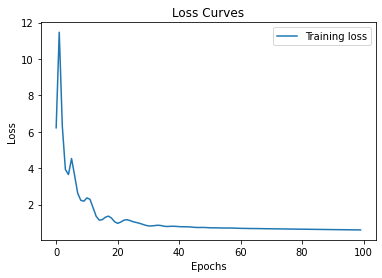

Test Loss: 0.6224203705787659
----------
hidden nodes: 8
learning rate: 1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 4.253492832183838


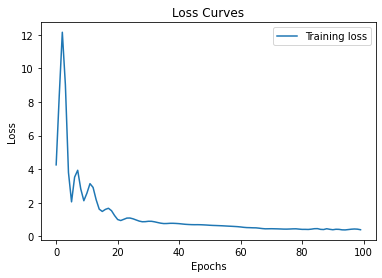

Test Loss: 0.395591139793396
----------
hidden nodes: 8
learning rate: 1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 4.434109687805176


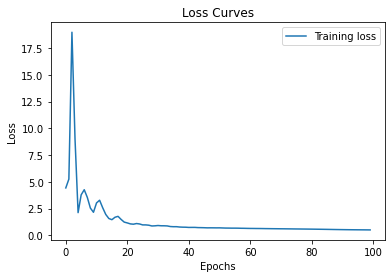

Test Loss: 0.5206717848777771
----------
hidden nodes: 8
learning rate: 1
epoch: 200
weight decay: 0
Epoch 0, Loss: 5.06046724319458
Epoch 100, Loss: 0.5502032041549683


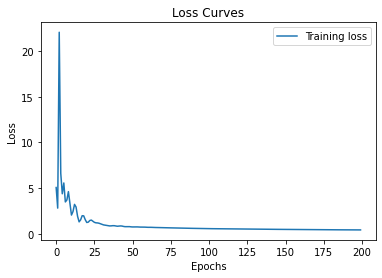

Test Loss: 0.42574501037597656
----------
hidden nodes: 8
learning rate: 1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 7.275733947753906
Epoch 100, Loss: 0.40066683292388916


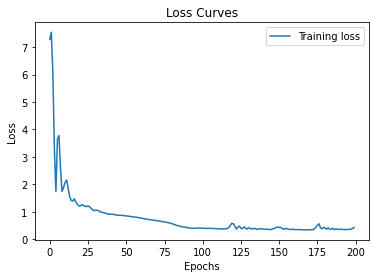

Test Loss: 0.47376886010169983
----------
hidden nodes: 8
learning rate: 1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 5.447163105010986
Epoch 100, Loss: 0.6624480485916138


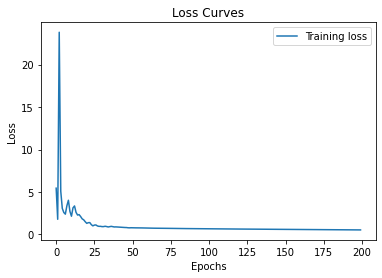

Test Loss: 0.5501712560653687
----------
hidden nodes: 8
learning rate: 1
epoch: 300
weight decay: 0
Epoch 0, Loss: 4.870631694793701
Epoch 100, Loss: 0.5842005014419556
Epoch 200, Loss: 0.39757490158081055


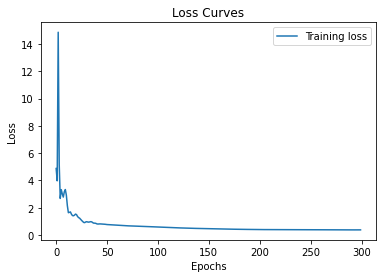

Test Loss: 0.3822524845600128
----------
hidden nodes: 8
learning rate: 1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 4.178283214569092
Epoch 100, Loss: 0.39993351697921753
Epoch 200, Loss: 0.35423117876052856


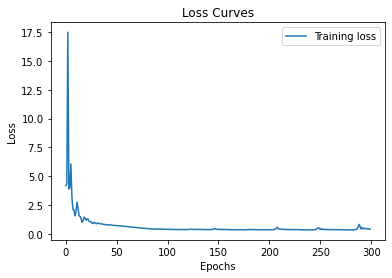

Test Loss: 0.4352709949016571
----------
hidden nodes: 8
learning rate: 1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 7.701881408691406
Epoch 100, Loss: 0.6395444869995117
Epoch 200, Loss: 0.46691808104515076


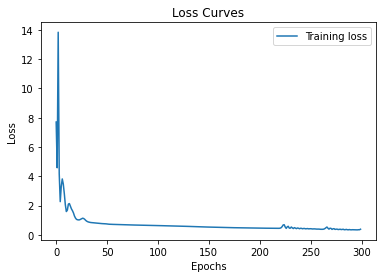

Test Loss: 0.4639633893966675
----------
hidden nodes: 11
learning rate: 0.01
epoch: 100
weight decay: 0
Epoch 0, Loss: 5.775157451629639


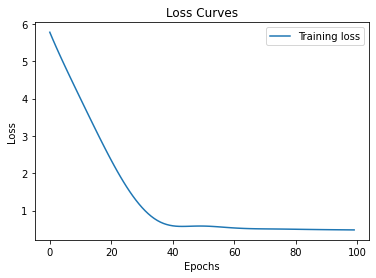

Test Loss: 0.5002119541168213
----------
hidden nodes: 11
learning rate: 0.01
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.178717613220215


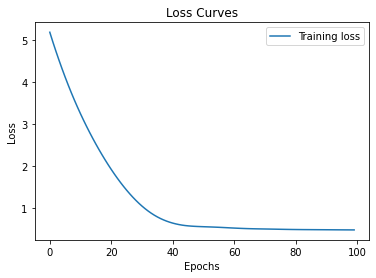

Test Loss: 0.48463109135627747
----------
hidden nodes: 11
learning rate: 0.01
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 5.007962226867676


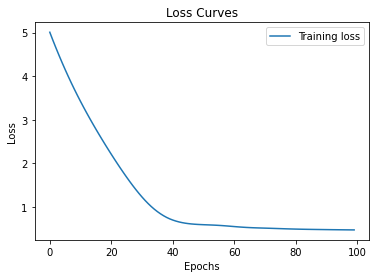

Test Loss: 0.4846159517765045
----------
hidden nodes: 11
learning rate: 0.01
epoch: 200
weight decay: 0
Epoch 0, Loss: 4.705977916717529
Epoch 100, Loss: 0.4657560884952545


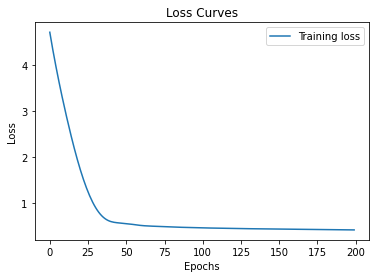

Test Loss: 0.43100491166114807
----------
hidden nodes: 11
learning rate: 0.01
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 5.630673885345459
Epoch 100, Loss: 0.4696255922317505


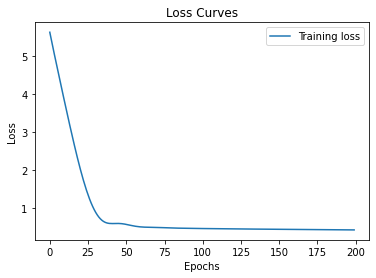

Test Loss: 0.44887569546699524
----------
hidden nodes: 11
learning rate: 0.01
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 4.983735084533691
Epoch 100, Loss: 0.47449636459350586


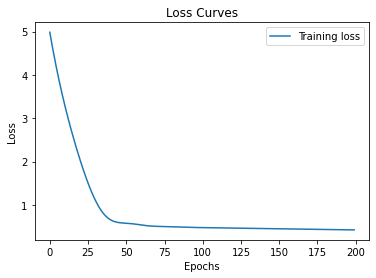

Test Loss: 0.4358159899711609
----------
hidden nodes: 11
learning rate: 0.01
epoch: 300
weight decay: 0
Epoch 0, Loss: 4.4839911460876465
Epoch 100, Loss: 0.47968536615371704
Epoch 200, Loss: 0.4422851800918579


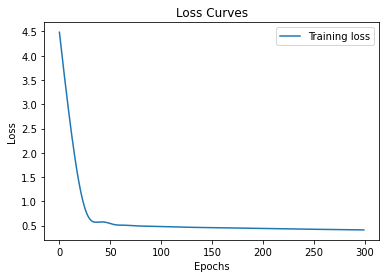

Test Loss: 0.4227038323879242
----------
hidden nodes: 11
learning rate: 0.01
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 5.041563034057617
Epoch 100, Loss: 0.46546730399131775
Epoch 200, Loss: 0.43756914138793945


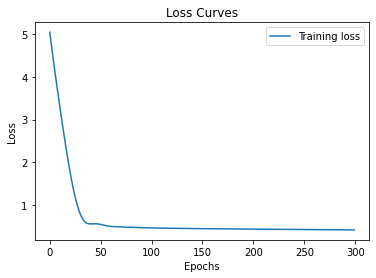

Test Loss: 0.4328653812408447
----------
hidden nodes: 11
learning rate: 0.01
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 5.208873748779297
Epoch 100, Loss: 0.47063717246055603
Epoch 200, Loss: 0.44002053141593933


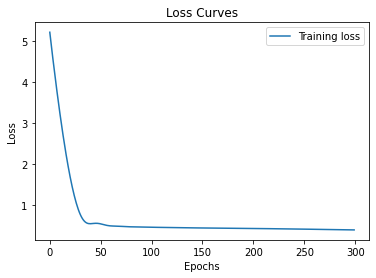

Test Loss: 0.4207226037979126
----------
hidden nodes: 11
learning rate: 0.1
epoch: 100
weight decay: 0
Epoch 0, Loss: 4.72286319732666


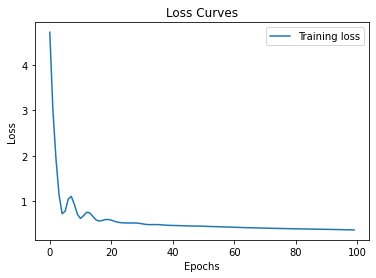

Test Loss: 0.38101324439048767
----------
hidden nodes: 11
learning rate: 0.1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 4.681077480316162


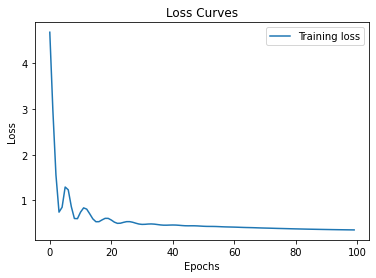

Test Loss: 0.37329041957855225
----------
hidden nodes: 11
learning rate: 0.1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 4.849618434906006


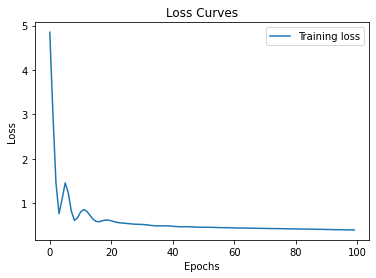

Test Loss: 0.410074919462204
----------
hidden nodes: 11
learning rate: 0.1
epoch: 200
weight decay: 0
Epoch 0, Loss: 6.420028209686279
Epoch 100, Loss: 0.37644556164741516


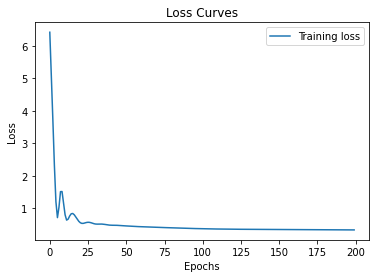

Test Loss: 0.35983964800834656
----------
hidden nodes: 11
learning rate: 0.1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 6.313210487365723
Epoch 100, Loss: 0.34454110264778137


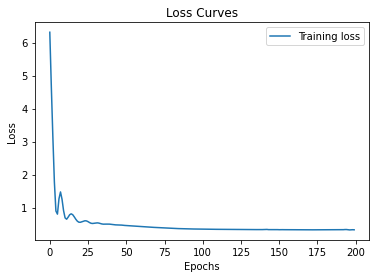

Test Loss: 0.3420766592025757
----------
hidden nodes: 11
learning rate: 0.1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 6.3621826171875
Epoch 100, Loss: 0.3782672882080078


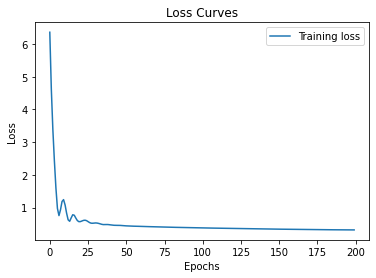

Test Loss: 0.3324778378009796
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
weight decay: 0
Epoch 0, Loss: 6.1013383865356445
Epoch 100, Loss: 0.41785672307014465
Epoch 200, Loss: 0.3397943377494812


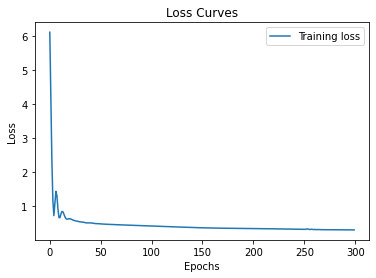

Test Loss: 0.3233410120010376
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 4.633542060852051
Epoch 100, Loss: 0.37737640738487244
Epoch 200, Loss: 0.33521920442581177


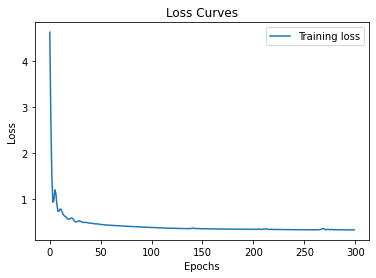

Test Loss: 0.34513142704963684
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 4.941706657409668
Epoch 100, Loss: 0.38258838653564453
Epoch 200, Loss: 0.315349817276001


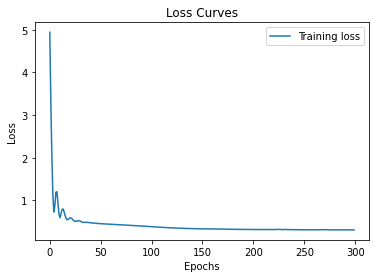

Test Loss: 0.32537367939949036
----------
hidden nodes: 11
learning rate: 1
epoch: 100
weight decay: 0
Epoch 0, Loss: 6.625450134277344


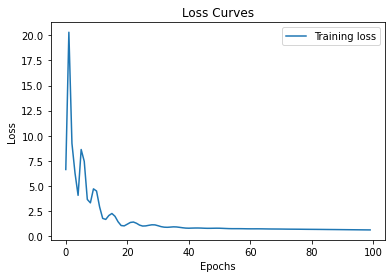

Test Loss: 0.6207268834114075
----------
hidden nodes: 11
learning rate: 1
epoch: 100
weight decay: 0.001
Epoch 0, Loss: 5.137842655181885


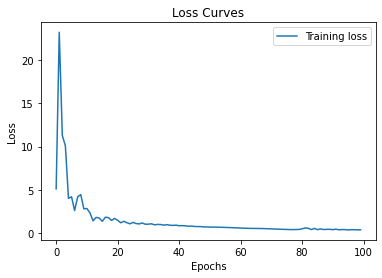

Test Loss: 0.42148637771606445
----------
hidden nodes: 11
learning rate: 1
epoch: 100
weight decay: 0.0001
Epoch 0, Loss: 4.35639762878418


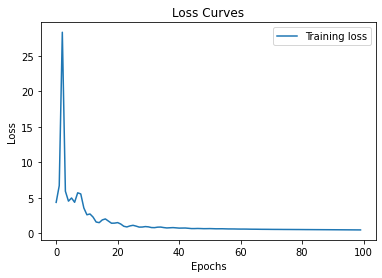

Test Loss: 0.4869329631328583
----------
hidden nodes: 11
learning rate: 1
epoch: 200
weight decay: 0
Epoch 0, Loss: 5.243906021118164
Epoch 100, Loss: 0.5233418345451355


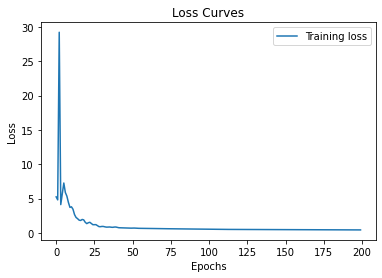

Test Loss: 0.43570828437805176
----------
hidden nodes: 11
learning rate: 1
epoch: 200
weight decay: 0.001
Epoch 0, Loss: 6.982458114624023
Epoch 100, Loss: 0.4288802444934845


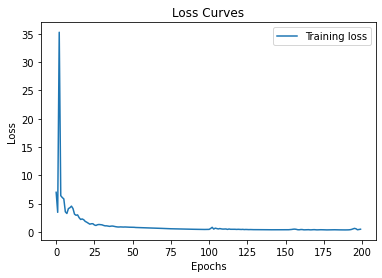

Test Loss: 0.3758988082408905
----------
hidden nodes: 11
learning rate: 1
epoch: 200
weight decay: 0.0001
Epoch 0, Loss: 4.573550701141357
Epoch 100, Loss: 0.600287914276123


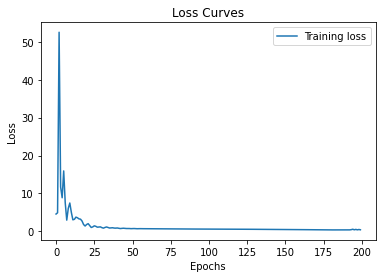

Test Loss: 0.44979894161224365
----------
hidden nodes: 11
learning rate: 1
epoch: 300
weight decay: 0
Epoch 0, Loss: 5.825108528137207
Epoch 100, Loss: 0.5771408081054688
Epoch 200, Loss: 0.4081501066684723


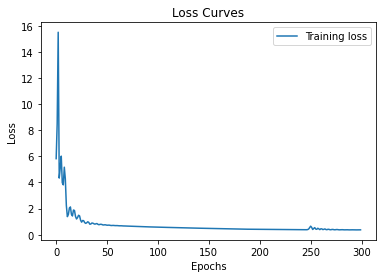

Test Loss: 0.3823048174381256
----------
hidden nodes: 11
learning rate: 1
epoch: 300
weight decay: 0.001
Epoch 0, Loss: 6.453526496887207
Epoch 100, Loss: 0.3884633779525757
Epoch 200, Loss: 0.40110230445861816


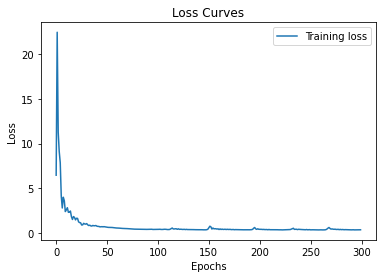

Test Loss: 0.3575434982776642
----------
hidden nodes: 11
learning rate: 1
epoch: 300
weight decay: 0.0001
Epoch 0, Loss: 6.592648983001709
Epoch 100, Loss: 0.5878696441650391
Epoch 200, Loss: 0.40005818009376526


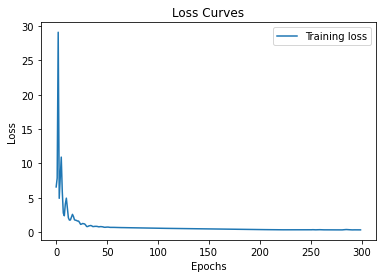

Test Loss: 0.37464669346809387
----------


In [ ]:
test_loss_list = []
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      for weight_decay in decay_list:
        # Define input size, hidden size, and output size
        D_in = X.shape[1]
        H = hidden_nodes
        D_out = 1
        
        print('hidden nodes:', H)
        print('learning rate:', lr_rate)
        print('epoch:', ep)
        print('weight decay:', weight_decay)

        # Define 2-layer neural network
        model = torch.nn.Sequential(
            torch.nn.Linear(D_in, H),
            torch.nn.Tanh(),
            torch.nn.Linear(H, D_out)
        )
        # Create the optimizer
        learning_rate = lr_rate
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        # Define the loss function
        criterion = nn.MSELoss()

        train_losses = []
        test_losses = []
        # Train the network
        for epoch in range(ep):
            inputs = torch.from_numpy(X_train).float()
            labels = torch.from_numpy(y_train).float()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Collect the training loss values in list
            train_losses.append(loss.item())

            if epoch % 100 == 0:
                print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

        # Plot the loss curves
        plt.plot(range(len(train_losses)), train_losses, label='Training loss')
        plt.title('Loss Curves')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

        # Evaluate the network
        model.eval()
        with torch.no_grad():
            test_inputs = torch.from_numpy(X_test).float()
            test_labels = torch.from_numpy(y_test).float()
            test_outputs = model(test_inputs)
            test_loss = criterion(test_outputs, test_labels)
            print('Test Loss: {}'.format(test_loss.item()))
        test_loss_list.append(test_loss)
        print('----------')

In [ ]:
min_value = min(test_loss_list)
min_index = test_loss_list.index(min_value)
print(min_value, min_index)
print('loss average :', sum(test_loss_list)/len(test_loss_list))

tensor(0.3233) 69
loss average : tensor(0.4296)


# Model setting 3:

hidden node : 11

initial weights : small random number

activation funciton : Tanh / ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : SGD

epoch : 300

Learning rate decay : none

=> setting 2 的 optimizer 改成「SGD」的結果，沒有Adam好

=> Tanh / ReLU 效果差不多


In [ ]:
hidden_nodes_list = [11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0.0001

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 4.538989067077637
Epoch 100, Loss: 0.47943204641342163
Epoch 200, Loss: 0.4573881924152374


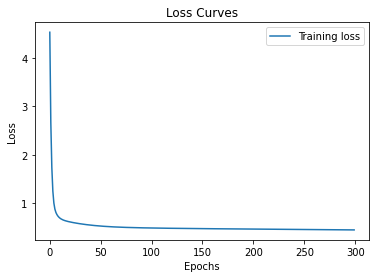

Test Loss: 0.45685645937919617
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Tanh(),
          torch.nn.Linear(H, D_out)
      )
      # Create the optimizer
      learning_rate = lr_rate
      optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 6.025201797485352
Epoch 100, Loss: 0.4753287434577942
Epoch 200, Loss: 0.44491249322891235


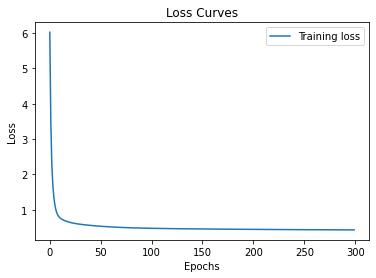

Test Loss: 0.4375719726085663
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      # Create the optimizer
      learning_rate = lr_rate
      optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# Model setting 4:

hidden node : 5, 8, 11

initial weights : small random number

activation funciton : Tanh / ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : Adagrad

epoch : 300

Learning rate decay : none

=> setting 2 optimizer 改成「Adagrad」的結果，比SGD好，沒有Adam好

=> ReLU 略好


In [ ]:
hidden_nodes_list = [11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0.0001

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 4.565315246582031
Epoch 100, Loss: 0.44217202067375183
Epoch 200, Loss: 0.40311399102211


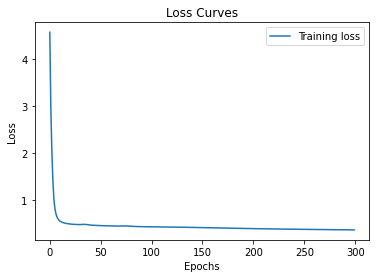

Test Loss: 0.3918355107307434
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Tanh(),
          torch.nn.Linear(H, D_out)
      )
      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, lr_decay=0, weight_decay=weight_decay, initial_accumulator_value=0)

      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 4.929290771484375
Epoch 100, Loss: 0.4105777442455292
Epoch 200, Loss: 0.38432031869888306


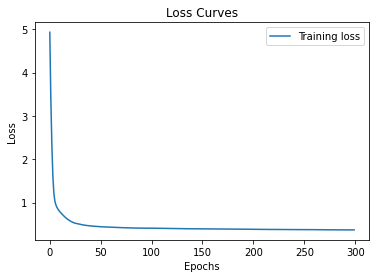

Test Loss: 0.37537500262260437
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.Adagrad(model.parameters(), lr=learning_rate, lr_decay=0, weight_decay=weight_decay, initial_accumulator_value=0)

      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# Model setting 5:

hidden node : 5, 8, 11

initial weights : small random number

activation funciton : ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : SGD + Momentum

epoch : 300

Learning rate decay : none

=> optimizer「SGD + Momentum」的結果，沒有比Adam好，跟Adagrad差不多

=> ReLU 略好

In [ ]:
hidden_nodes_list = [11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 5.977707386016846
Epoch 100, Loss: 0.41620880365371704
Epoch 200, Loss: 0.39084064960479736


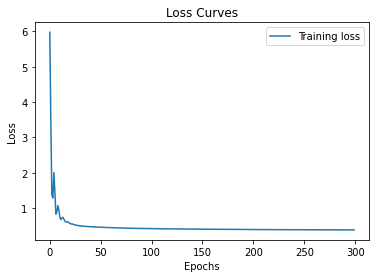

Test Loss: 0.39671051502227783
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Tanh(),
          torch.nn.Linear(H, D_out)
      )
      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=0.78)

      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 4.360838413238525
Epoch 100, Loss: 0.40123075246810913
Epoch 200, Loss: 0.3735576868057251


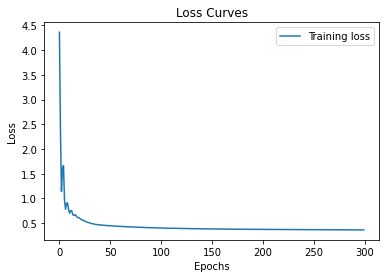

Test Loss: 0.3740498125553131
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=0.78)

      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# Model setting 6:

hidden node : 5, 8, 11

initial weights : small random number

activation funciton : ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : Adam

epoch : 300

Learning rate decay : cosine

=> 把setting 1 第二好的model，learning rate decay改成「cosine」，結果沒有比較好

In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR

In [ ]:
hidden_nodes_list = [5, 8, 11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0.0001

hidden nodes: 5
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 7.2321882247924805
Epoch 100, Loss: 0.43520587682724
Epoch 200, Loss: 0.44324156641960144


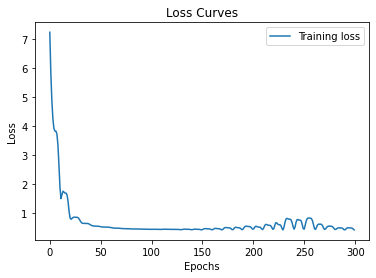

Test Loss: 0.42321300506591797
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 7.43314790725708
Epoch 100, Loss: 0.44204217195510864
Epoch 200, Loss: 0.49253615736961365


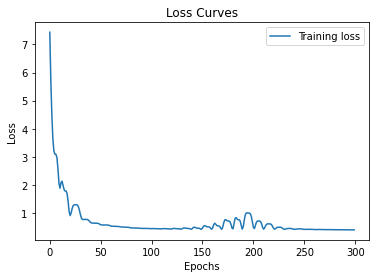

Test Loss: 0.39547932147979736
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 4.24940299987793
Epoch 100, Loss: 0.5025864839553833
Epoch 200, Loss: 0.403647780418396


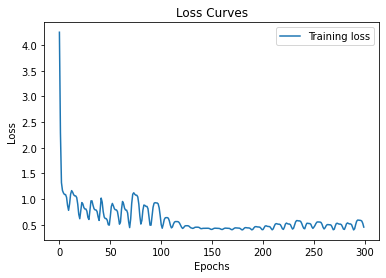

Test Loss: 0.40655437111854553
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      # Create the optimizer
      learning_rate = lr_rate
      optimizer = optim.Adam(model.parameters(), lr=learning_rate)
      scheduler = CosineAnnealingLR(optimizer, 
                                    T_max = 5, # 半週期
                                    eta_min = 1e-4) # Minimum learning rate.
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          
          # Update learning rate
          scheduler.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# Model setting 7:

hidden node : 5, 8, 11

initial weights : small random number

activation funciton : ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : SGD + Momentum

epoch : 300

Learning rate decay : cosine

=> 把setting 5 最好的model，learning rate decay改成「cosine」，結果不好

In [ ]:
hidden_nodes_list = [5, 8, 11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0.0001

hidden nodes: 5
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 7.776759147644043
Epoch 100, Loss: 0.4654099941253662
Epoch 200, Loss: 0.4240184724330902


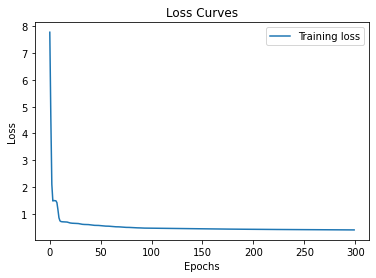

Test Loss: 0.41197511553764343
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 6.032460689544678
Epoch 100, Loss: 0.48383787274360657
Epoch 200, Loss: 0.4382799565792084


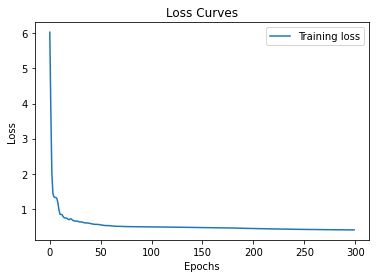

Test Loss: 0.4109075665473938
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 5.139584064483643
Epoch 100, Loss: 0.45490536093711853
Epoch 200, Loss: 0.41591402888298035


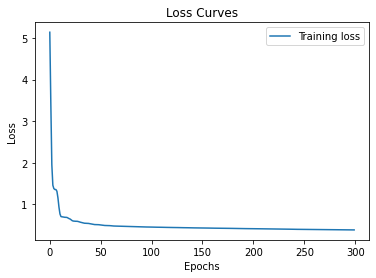

Test Loss: 0.39942365884780884
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.78)
      scheduler = CosineAnnealingLR(optimizer, 
                                    T_max = 5, # Maximum number of iterations.
                                    eta_min = 1e-4) # Minimum learning rate.
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          scheduler.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# Model setting 8:

hidden node : 11

initial weights : Xavier

activation funciton : ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : Adam

epoch : 300

Learning rate decay : none

=> setting 1,2 的 initial weights 改成「Xavier」，Tanh的效果略好一點。

In [ ]:
hidden_nodes_list = [5, 8, 11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0.0001

hidden nodes: 5
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 7.197460651397705
Epoch 100, Loss: 0.46697503328323364
Epoch 200, Loss: 0.39066171646118164


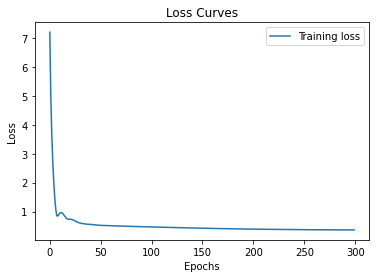

Test Loss: 0.38393232226371765
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 7.709078788757324
Epoch 100, Loss: 0.3882867097854614
Epoch 200, Loss: 0.3414440155029297


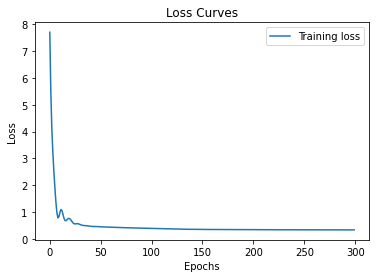

Test Loss: 0.34572604298591614
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 8.625277519226074
Epoch 100, Loss: 0.42102840542793274
Epoch 200, Loss: 0.3320722281932831


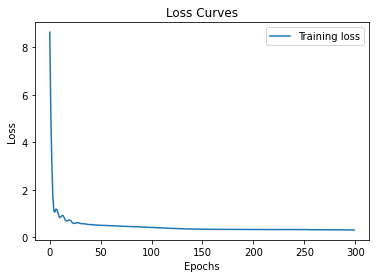

Test Loss: 0.33082228899002075
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Tanh(),
          torch.nn.Linear(H, D_out)
      )
      
      # Initialize the weights using Xavier initialization
      for layer in model:
          if isinstance(layer, nn.Linear):
              nn.init.xavier_uniform_(layer.weight)

      # Create the optimizer
      learning_rate = lr_rate
      optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

hidden nodes: 5
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 7.939327239990234
Epoch 100, Loss: 0.4166403114795685
Epoch 200, Loss: 0.40480324625968933


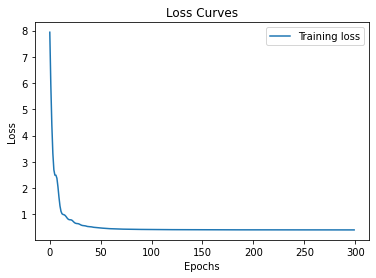

Test Loss: 0.40084370970726013
----------
hidden nodes: 8
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 6.1097798347473145
Epoch 100, Loss: 0.396894246339798
Epoch 200, Loss: 0.3622923195362091


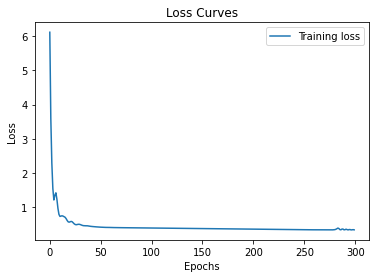

Test Loss: 0.3518245220184326
----------
hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 9.169702529907227
Epoch 100, Loss: 0.3927295506000519
Epoch 200, Loss: 0.37140634655952454


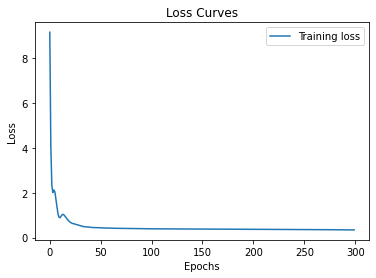

Test Loss: 0.3509732186794281
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      
      # Initialize the weights using Xavier initialization
      for layer in model:
          if isinstance(layer, nn.Linear):
              nn.init.xavier_uniform_(layer.weight)

      # Create the optimizer
      learning_rate = lr_rate
      optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# Model setting 9:

hidden node : 11

initial weights : Xavier

activation funciton : ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : SGD + Momentum

epoch : 300

Learning rate decay : none

=> 把setting 5 最好的model，initial weights 改成「Xavier」，結果有略好一點。

In [ ]:
hidden_nodes_list = [11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0.0001

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 5.270333290100098
Epoch 100, Loss: 0.4229642152786255
Epoch 200, Loss: 0.3939371109008789


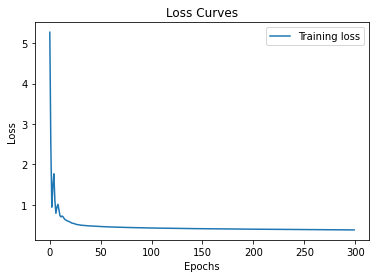

Test Loss: 0.3906896710395813
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Tanh(),
          torch.nn.Linear(H, D_out)
      )
      
      # Initialize the weights using Xavier initialization
      for layer in model:
          if isinstance(layer, nn.Linear):
              nn.init.xavier_uniform_(layer.weight)

      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,weight_decay=weight_decay, momentum=0.78)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 7.875154495239258
Epoch 100, Loss: 0.4115526080131531
Epoch 200, Loss: 0.38033661246299744


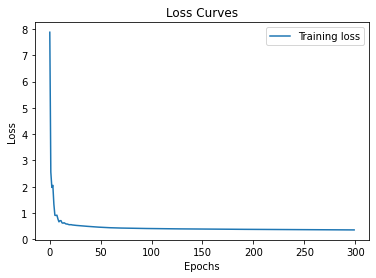

Test Loss: 0.3669731616973877
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      
      # Initialize the weights using Xavier initialization
      for layer in model:
          if isinstance(layer, nn.Linear):
              nn.init.xavier_uniform_(layer.weight)

      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,weight_decay=weight_decay, momentum=0.78)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# Model setting 10:

hidden node : 11

initial weights : Kaiming

activation funciton : ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : Adam

epoch : 300

Learning rate decay : none

=> 和setting 8相比，initial weights 改成「Kaiming」，結果差不多

In [ ]:
hidden_nodes_list = [11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0.0001

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 6.387643337249756
Epoch 100, Loss: 0.432204008102417
Epoch 200, Loss: 0.3388857841491699


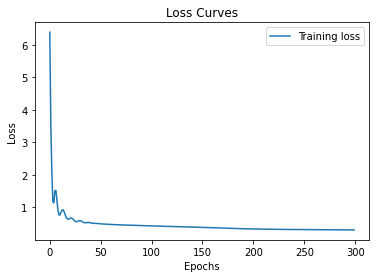

Test Loss: 0.3330305218696594
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Tanh(),
          torch.nn.Linear(H, D_out)
      )
      
      # Initialize the weights using Kaiming initialization
      for layer in model:
          if isinstance(layer, nn.Linear):
              nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

      # Create the optimizer
      learning_rate = lr_rate
      optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 6.081831455230713
Epoch 100, Loss: 0.3884885311126709
Epoch 200, Loss: 0.3612864315509796


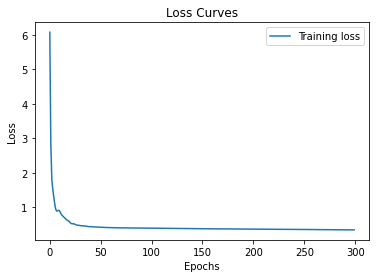

Test Loss: 0.34599819779396057
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      
      # Initialize the weights using Kaiming initialization
      for layer in model:
          if isinstance(layer, nn.Linear):
              nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

      # Create the optimizer
      learning_rate = lr_rate
      optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# Model setting 11:

hidden node : 11

initial weights : Kaiming

activation funciton : ReLU

learning rate : 0.1

weight decay : 0.0001

optimizer : SGD + Momentum

epoch : 300

Learning rate decay : none

=> 和setting 9相比，initial weights「改成」Kaiming，結果差不多，略差一點點。

In [ ]:
hidden_nodes_list = [11]
learning_rate_list = [0.1]
epoch_list = [300]
weight_decay = 0.0001

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 8.036975860595703
Epoch 100, Loss: 0.4143829941749573
Epoch 200, Loss: 0.3811064660549164


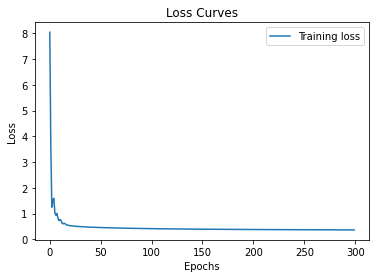

Test Loss: 0.37722304463386536
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.Tanh(),
          torch.nn.Linear(H, D_out)
      )
      
      # Initialize the weights using Kaiming initialization
      for layer in model:
          if isinstance(layer, nn.Linear):
              nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=0.78)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

hidden nodes: 11
learning rate: 0.1
epoch: 300
Epoch 0, Loss: 4.456959247589111
Epoch 100, Loss: 0.4213656187057495
Epoch 200, Loss: 0.39426255226135254


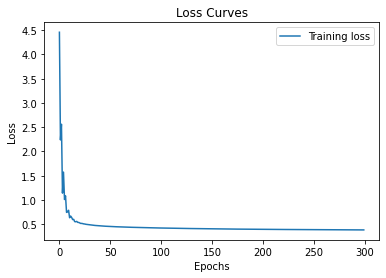

Test Loss: 0.38756063580513
----------


In [ ]:
for hidden_nodes in hidden_nodes_list:
  for lr_rate in learning_rate_list:
    for ep in epoch_list:
      # Define input size, hidden size, and output size
      D_in = X.shape[1]
      H = hidden_nodes
      D_out = 1
      
      print('hidden nodes:', H)
      print('learning rate:', lr_rate)
      print('epoch:', ep)

      # Define 2-layer neural network
      model = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),
          torch.nn.ReLU(),
          torch.nn.Linear(H, D_out)
      )
      
      # Initialize the weights using Kaiming initialization
      for layer in model:
          if isinstance(layer, nn.Linear):
              nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

      # Create the optimizer
      learning_rate = lr_rate
      optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=0.78)
      # Define the loss function
      criterion = nn.MSELoss()

      train_losses = []
      test_losses = []
      # Train the network
      for epoch in range(ep):
          inputs = torch.from_numpy(X_train).float()
          labels = torch.from_numpy(y_train).float()

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          # Collect the training loss values in list
          train_losses.append(loss.item())

          if epoch % 100 == 0:
              print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

      # Plot the loss curves
      plt.plot(range(len(train_losses)), train_losses, label='Training loss')
      plt.title('Loss Curves')
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.legend()
      plt.show()

      # Evaluate the network
      model.eval()
      with torch.no_grad():
          test_inputs = torch.from_numpy(X_test).float()
          test_labels = torch.from_numpy(y_test).float()
          test_outputs = model(test_inputs)
          test_loss = criterion(test_outputs, test_labels)
          print('Test Loss: {}'.format(test_loss.item()))
      
      print('----------')

# No.1 model

hidden nodes: 11
learning rate: 0.1
weight decay: 0.0001
epoch: 300
Epoch 0, Loss: 5.334795951843262
Epoch 100, Loss: 0.39235585927963257
Epoch 200, Loss: 0.3254290521144867


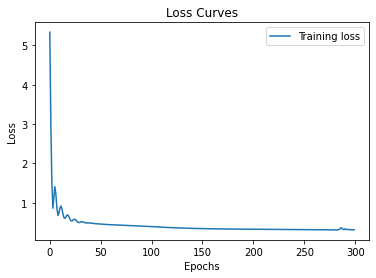

Test Loss: 0.32643747329711914


In [ ]:

# Define input size, hidden size, and output size
D_in = X.shape[1]
H = 11
D_out = 1

print('hidden nodes:', H)
print('learning rate:', 0.1)
print('weight decay:', 0.0001)
print('epoch:', 300)

# Define 2-layer neural network
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out)
)

# Initialize the weights using Xavier initialization
for layer in model:
    if isinstance(layer, nn.Linear):
        nn.init.xavier_uniform_(layer.weight)

# Create the optimizer
learning_rate = 0.1
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001)
# Define the loss function
criterion = nn.MSELoss()

train_losses = []
test_losses = []
# Train the network
for epoch in range(300):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Collect the training loss values in list
    train_losses.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

# Plot the loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the network
model.eval()
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test).float()
    test_labels = torch.from_numpy(y_test).float()
    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_labels)
    print('Test Loss: {}'.format(test_loss.item()))


In [ ]:
torch.save(model, './models/model_1.pt')

# No.2 model

hidden nodes: 11
learning rate: 0.1
weight decay: 0.0001
epoch: 300
Epoch 0, Loss: 5.562429428100586
Epoch 100, Loss: 0.40090933442115784
Epoch 200, Loss: 0.3356170654296875


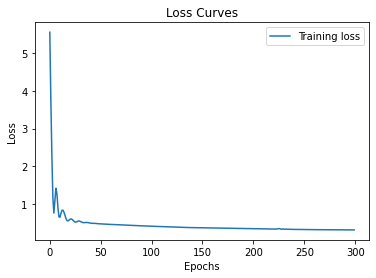

Test Loss: 0.3218887746334076


In [ ]:

# Define input size, hidden size, and output size
D_in = X.shape[1]
H = hidden_nodes
D_out = 1

print('hidden nodes:', H)
print('learning rate:', 0.1)
print('weight decay:', 0.0001)
print('epoch:', 300)

# Define 2-layer neural network
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out)
)
# Create the optimizer
learning_rate = 0.1
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001)
# Define the loss function
criterion = nn.MSELoss()

train_losses = []
test_losses = []
# Train the network
for epoch in range(300):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Collect the training loss values in list
    train_losses.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

# Plot the loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the network
model.eval()
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test).float()
    test_labels = torch.from_numpy(y_test).float()
    test_outputs = model(test_inputs)
    test_loss = criterion(test_outputs, test_labels)
    print('Test Loss: {}'.format(test_loss.item()))
test_loss_list.append(test_loss)


In [ ]:
torch.save(model, './models/model_2.pt')

# No.3 model

hidden nodes: 11
learning rate: 0.1
weight decay: 0.0001
epoch: 300
Epoch 0, Loss: 5.898963451385498
Epoch 100, Loss: 0.3820478320121765
Epoch 200, Loss: 0.3482745587825775


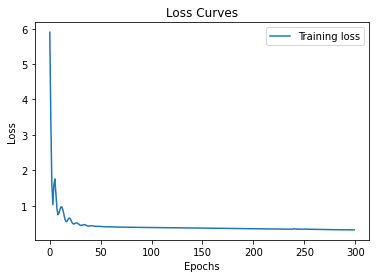

Test Loss: 0.3339647352695465


In [ ]:

# Define input size, hidden size, and output size
D_in = X.shape[1]
H = hidden_nodes
D_out = 1

print('hidden nodes:', H)
print('learning rate:', 0.1)
print('weight decay:', 0.0001)
print('epoch:', 300)

# Define 2-layer neural network
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out)
)
# Create the optimizer
learning_rate = 0.1
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0001)
# Define the loss function
criterion = nn.MSELoss()

train_losses = []
test_losses = []
# Train the network
for epoch in range(300):
    inputs = torch.from_numpy(X_train).float()
    labels = torch.from_numpy(y_train).float()

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Collect the training loss values in list
    train_losses.append(loss.item())

    if epoch % 100 == 0:
        print('Epoch {}, Loss: {}'.format(epoch, loss.item()))

# Plot the loss curves
plt.plot(range(len(train_losses)), train_losses, label='Training loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the network
model.eval()
with torch.no_grad():
  test_inputs = torch.from_numpy(X_test).float()
  test_labels = torch.from_numpy(y_test).float()
  test_outputs = model(test_inputs)
  test_loss = criterion(test_outputs, test_labels)
  print('Test Loss: {}'.format(test_loss.item()))



In [ ]:
torch.save(model, './models/model_3.pt')